<a href="https://colab.research.google.com/github/Krumpu/Homework_ICA/blob/main/HW_1_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('_mpl-gallery')
url = 'https://raw.githubusercontent.com/Krumpu/Homework_ICA/main/Data-Melbourne_F.csv'
df = pd.read_csv(url)

# We can remove "year", "month" and "day" columns,
# since we did no time series analysis today...
# "VG" is removed, we do not have any info about
df = df.drop(['SLP', 'VG', 'year', 'month', 'day'], axis=1)

# Information about our data set
print('Number of Observations (N): ', df.shape[0])
print('Number of Predictor Variables (D): ', df.shape[1])

# Q diabos é isso abaix kaique??? Why?
print(df['COD'].describe())
print(df['BOD'].describe())

Number of Observations (N):  1382
Number of Predictor Variables (D):  15
count    1382.000000
mean      845.960434
std       145.416540
min       360.000000
25%       751.250000
50%       845.000000
75%       920.000000
max      1700.000000
Name: COD, dtype: float64
count    1382.000000
mean      382.061708
std        85.996012
min       140.000000
25%       330.000000
50%       360.000000
75%       422.980000
max       850.000000
Name: BOD, dtype: float64


#**Classes**

Como indicadores de economia/deseperdicio durante o tratamento, utilizaremos as métricas COD e BOD, que respectivamente significam Chemical Oxygen Demand (mg/L) e Biological Oxygen Demand (mg/L).\
\
Dessa forma, podemos dividir o intervalo desses indicadores em n partes, utilizando-as como classificação.\
\
A Chemical Oxygen Demand(COD), indica a quantidade de oxigênio utilizado durante a reação quimica para consumir contaminantes presentes. \
Já a Biological Oxygen Demand(BOD), é a unidade de medida utilizada para determinar a quantidade de oxigênio utilizado por organismos biológicos aeróbicos. \
Com os dois indicativos construiremos classes formadas da combinação dos dois intervalos criados pela média de COD e de BOD. \
\
Iremos dividir os nossos dados em 3 intervalos para cada um dos seguintes preditores:\
COD:\
  Baixo: 360 - 790;\
  Medio: 791 - 890;\
  Alto: 891 - 1700.\
\
BOD:\
  Baixo 140 - 340;\
  Medio: 341 - 400;\
  Alto : 401 - 850.\
\
PP:\
  No_rain: <0.1;\
  Light_rain: 0.1 - 1;\
  Moderate_rain: >1;\
\
Tipo 1: Baixo - Baixo; Tipo 2: Baixo - Medio; Tipo 3 Baixo - Alto;\
Tipo 4: Medio - Baixo; Tipo 5: Medio - Medio; Tipo 6 Medio - Alto;\
Tipo 7: Alto - Baixo; Tipo 8: Alto - Medio; Tipo 9 Alto - Alto.

In [3]:
# Testing values - Marco

df_sorted3 = df['PP'].sort_values(ascending=False)
print(df_sorted3.head(75))


70     18.03
199    16.51
69     16.26
284    13.72
179    12.95
       ...  
160     0.51
155     0.51
239     0.51
103     0.51
266     0.51
Name: PP, Length: 75, dtype: float64


In [ ]:
df_cod_baixo = df[(df['COD'] >=360) & (df['COD'] <= 790)]
df_cod_medio = df[(df['COD'] >=791) & (df['COD'] <= 890)]
df_cod_alto = df[(df['COD'] >=891) & (df['COD'] <= 1700)]

df_bod_baixo = df[(df['BOD'] >=140) & (df['BOD'] <= 340)]
df_bod_medio = df[(df['BOD'] >=341) & (df['BOD'] <= 400)]
df_bod_alto = df[(df['BOD'] >=401) & (df['BOD'] <= 850)]

df_no_rain = df[df['PP'] < 0.1]
df_light_rain = df[(df['PP'] >= 0.01) & (df['PP'] <= 1)]
df_moderate_rain = df[df['PP'] > 1]


tipo1 = pd.merge(df_cod_baixo, df_bod_baixo, how='inner')
tipo2 = pd.merge(df_cod_baixo, df_bod_medio, how='inner')
tipo3 = pd.merge(df_cod_baixo, df_bod_alto, how='inner')

tipo4 = pd.merge(df_cod_medio, df_bod_baixo, how='inner')
tipo5 = pd.merge(df_cod_medio, df_bod_medio, how='inner')
tipo6 = pd.merge(df_cod_medio, df_bod_alto, how='inner')

tipo7 = pd.merge(df_cod_alto, df_bod_baixo, how='inner')
tipo8 = pd.merge(df_cod_alto, df_bod_medio, how='inner')
tipo9 = pd.merge(df_cod_alto, df_bod_alto, how='inner')

tipos = [tipo1, tipo2, tipo3, tipo4, tipo5, tipo6, tipo7, tipo8, tipo9]

#for i, tipo in enumerate(tipos):
  #print(f"Type {i+1}: {tipo.shape[0]} rows\n", tipo.head(), "\n")

#for i, tipo in enumerate(tipos):
    #print(f"Tipo {i}: {tipo.shape[0]}")

In [5]:
def analyze_dataset(df: pd.DataFrame):
    stats_analysis = pd.DataFrame(columns=['name', 'mean', 'standard_deviation', 'skewness'])

    for index, predictor in enumerate(df.columns):
        stats_analysis.loc[index] = [predictor, df[predictor].mean(), df[predictor].std(), df[predictor].skew()]

    # For index starting at 1
    stats_analysis.index = stats_analysis.index + 1
    return stats_analysis

name           mean  standard_deviation   skewness
1   avg_outflow       3.930608            1.228778   0.380545
2    avg_inflow       4.506338            1.439583   3.751865
3    total_grid  275159.089001        44640.533689  -0.148416
4            Am      39.222302            7.761598   0.310626
5           BOD     382.061708           85.996012   1.234594
6           COD     845.960434          145.416540   0.743344
7            TN      62.740752            3.571035  -0.256672
8             T      15.036686            5.398491   0.552359
9            TM      20.530897            7.096760   0.485291
10           Tm      10.037337            4.656887   0.498749
11            H      63.558611           14.534205  -0.809744
12           PP       0.218090            1.306923   8.763062
13           VV       9.101592           16.322905  22.195410
14            V      19.482706            7.136868   0.833200
15           VM      35.381259           11.626362   0.552547

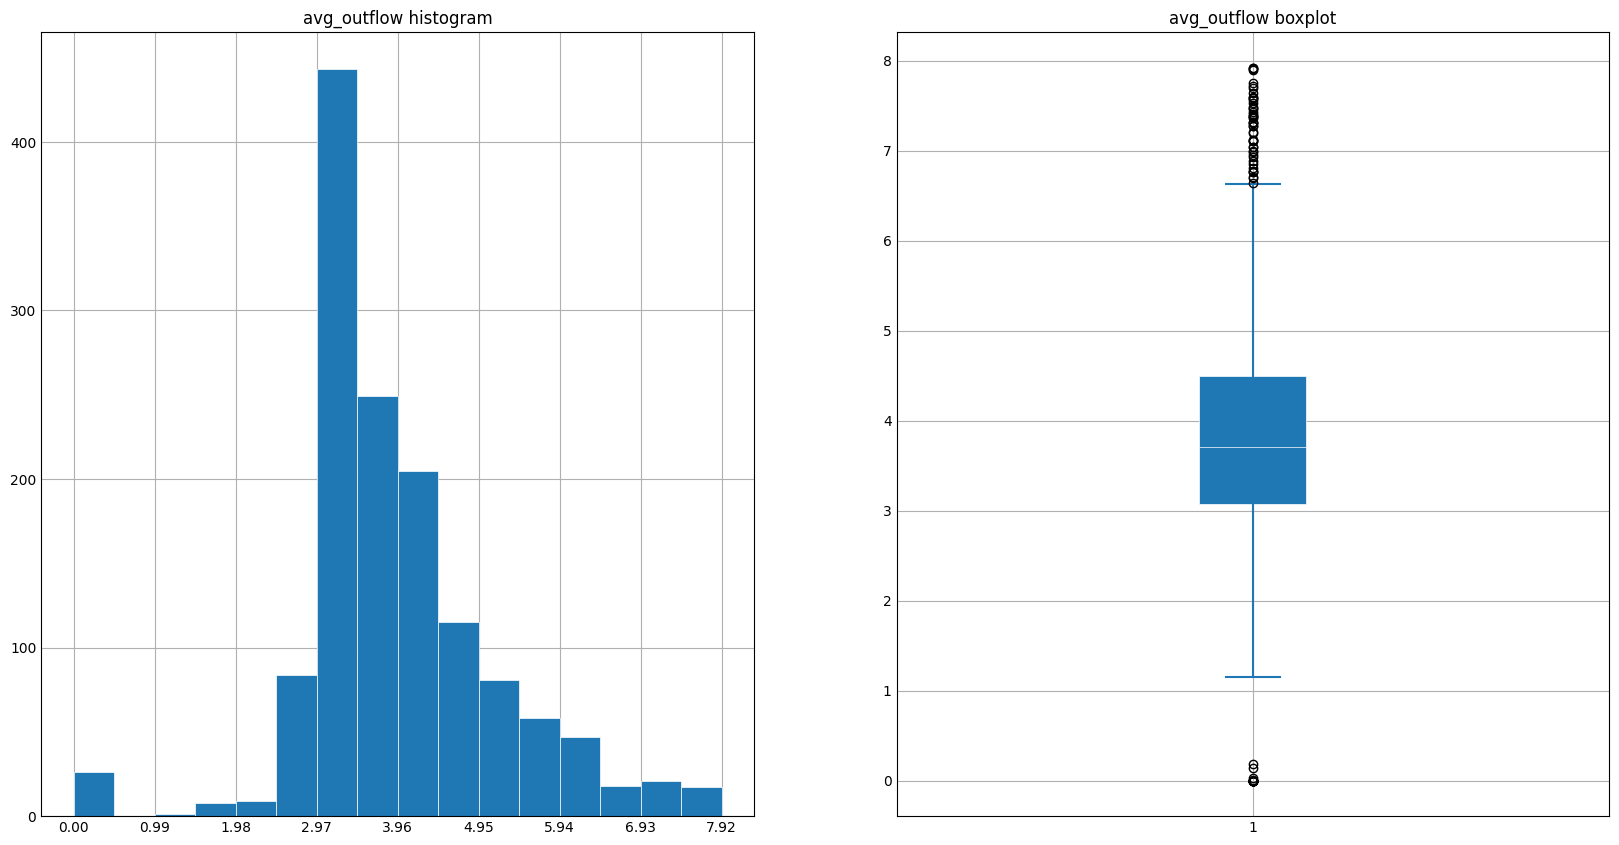

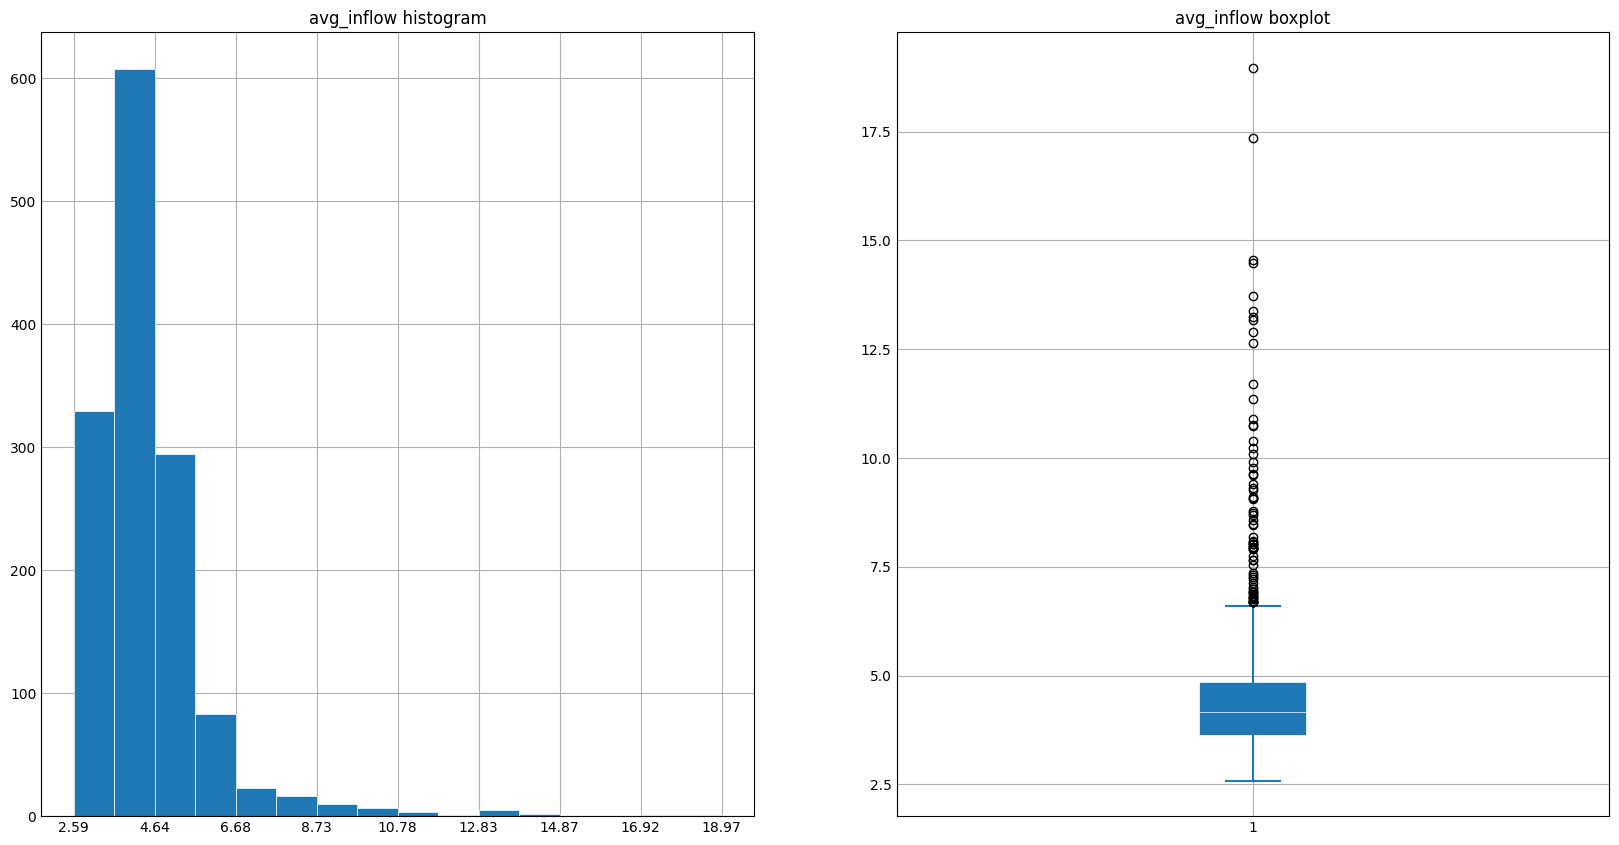

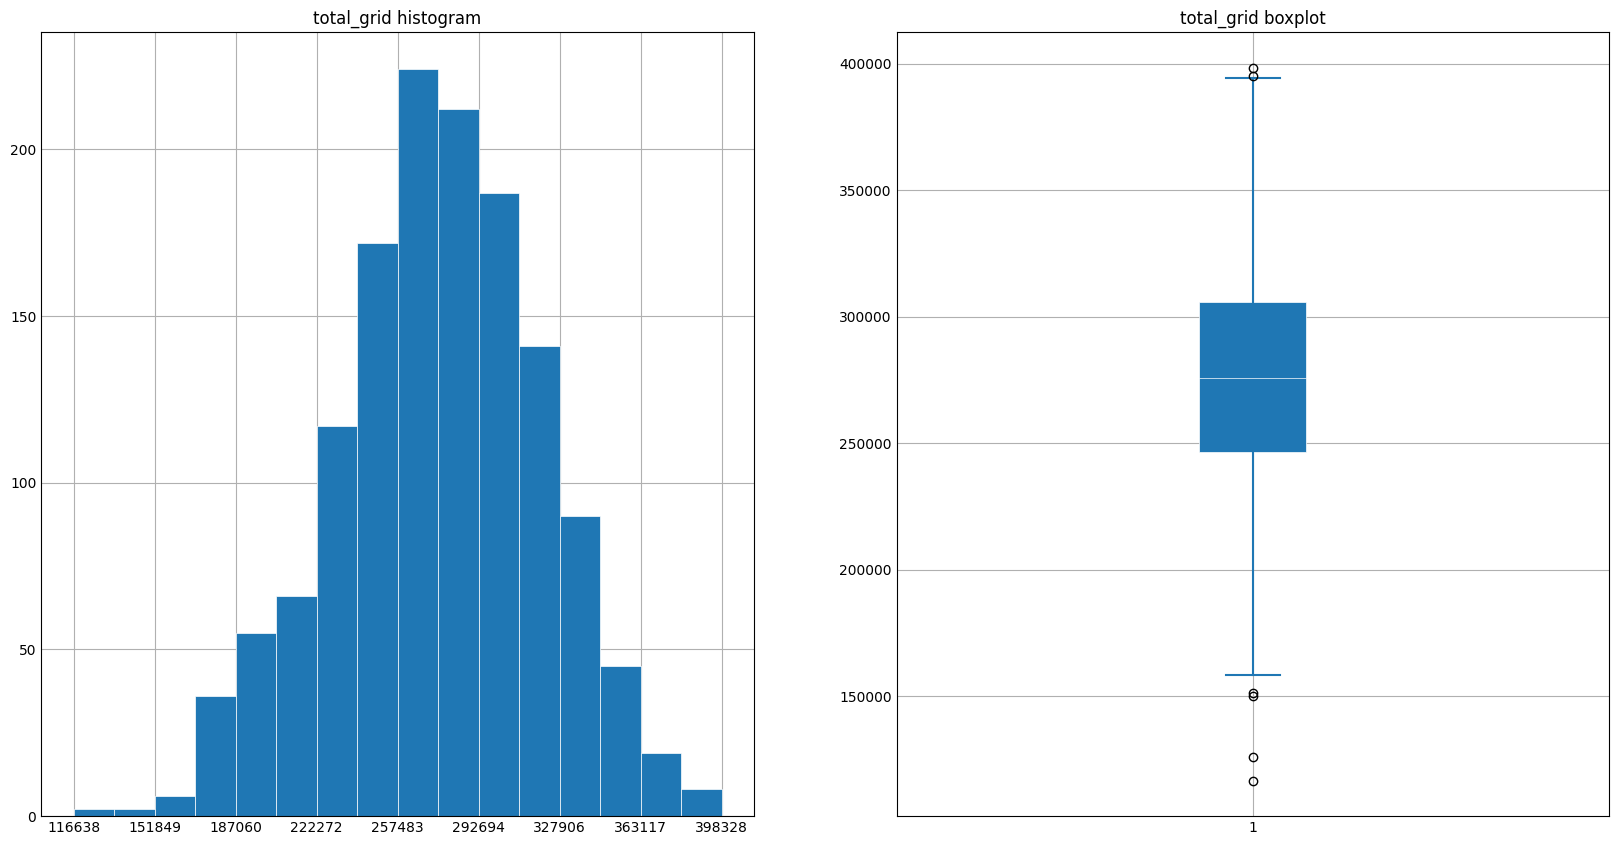

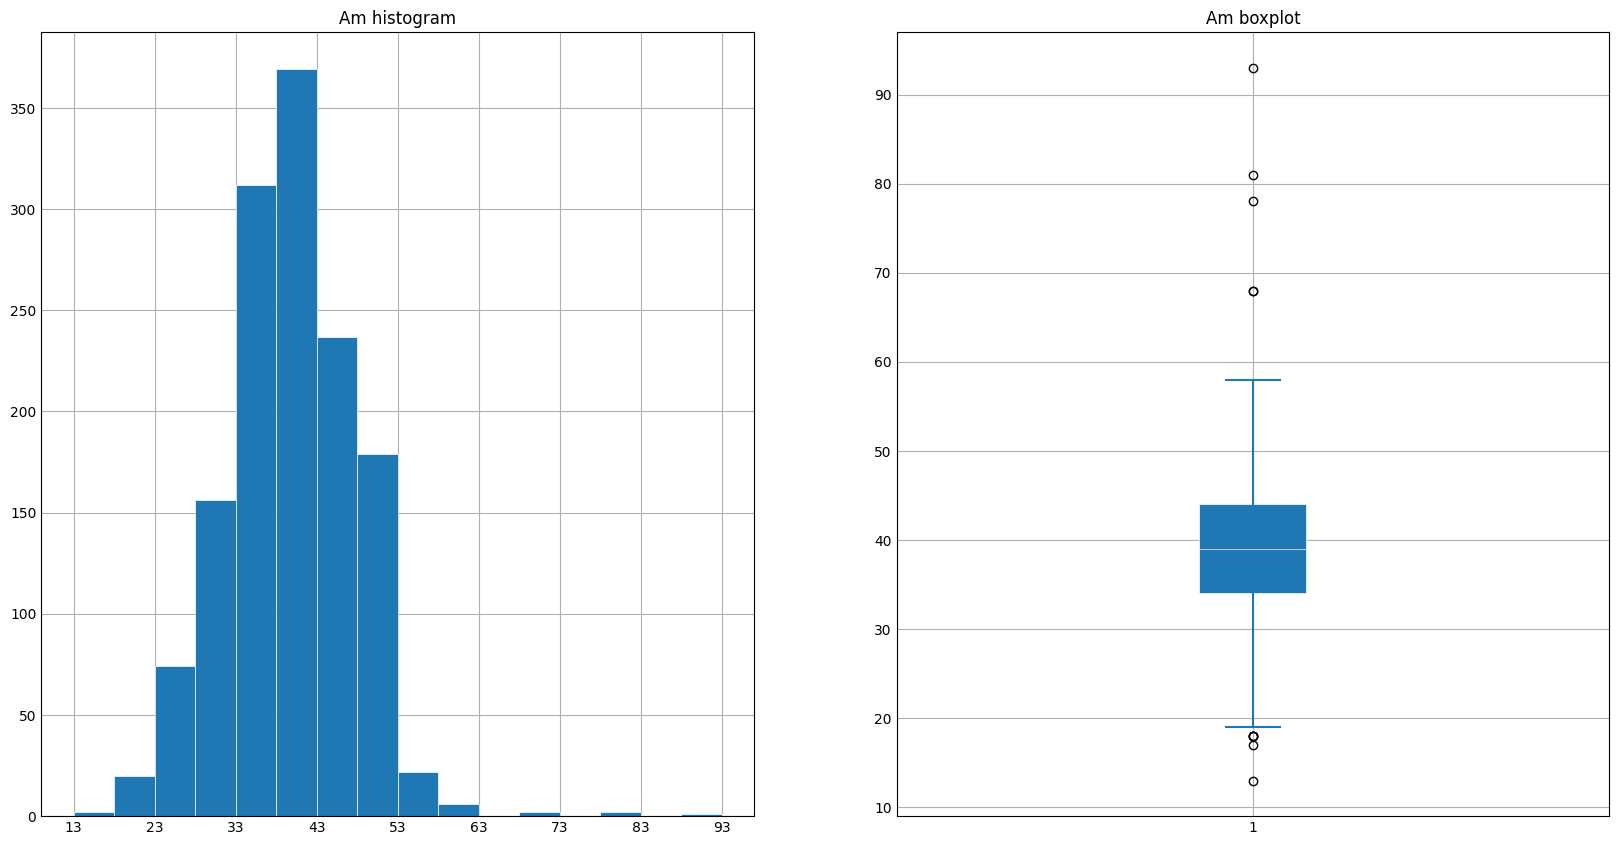

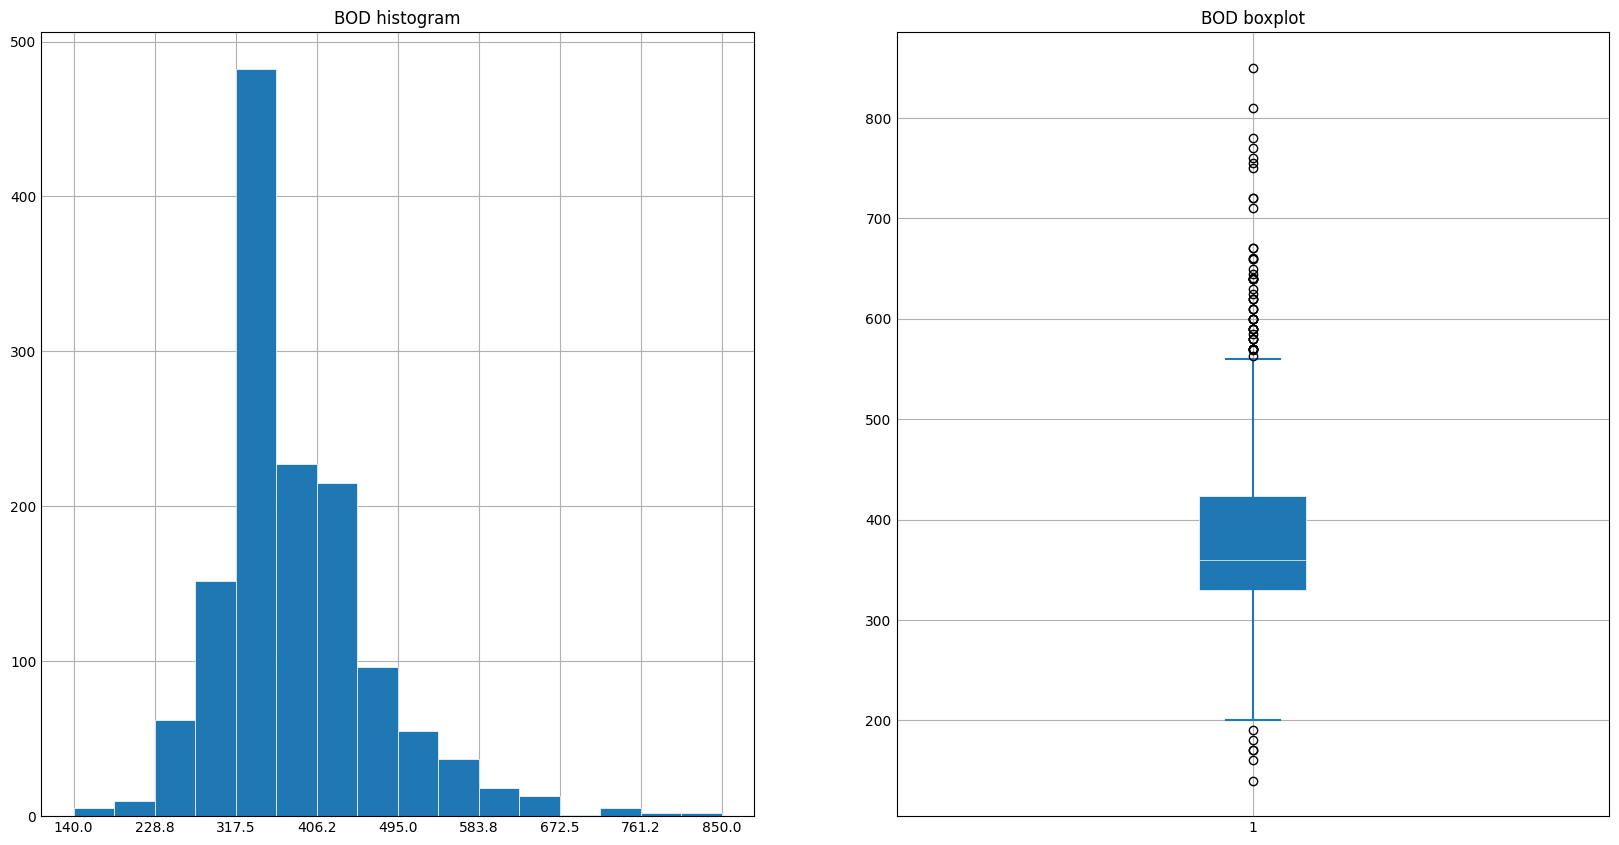

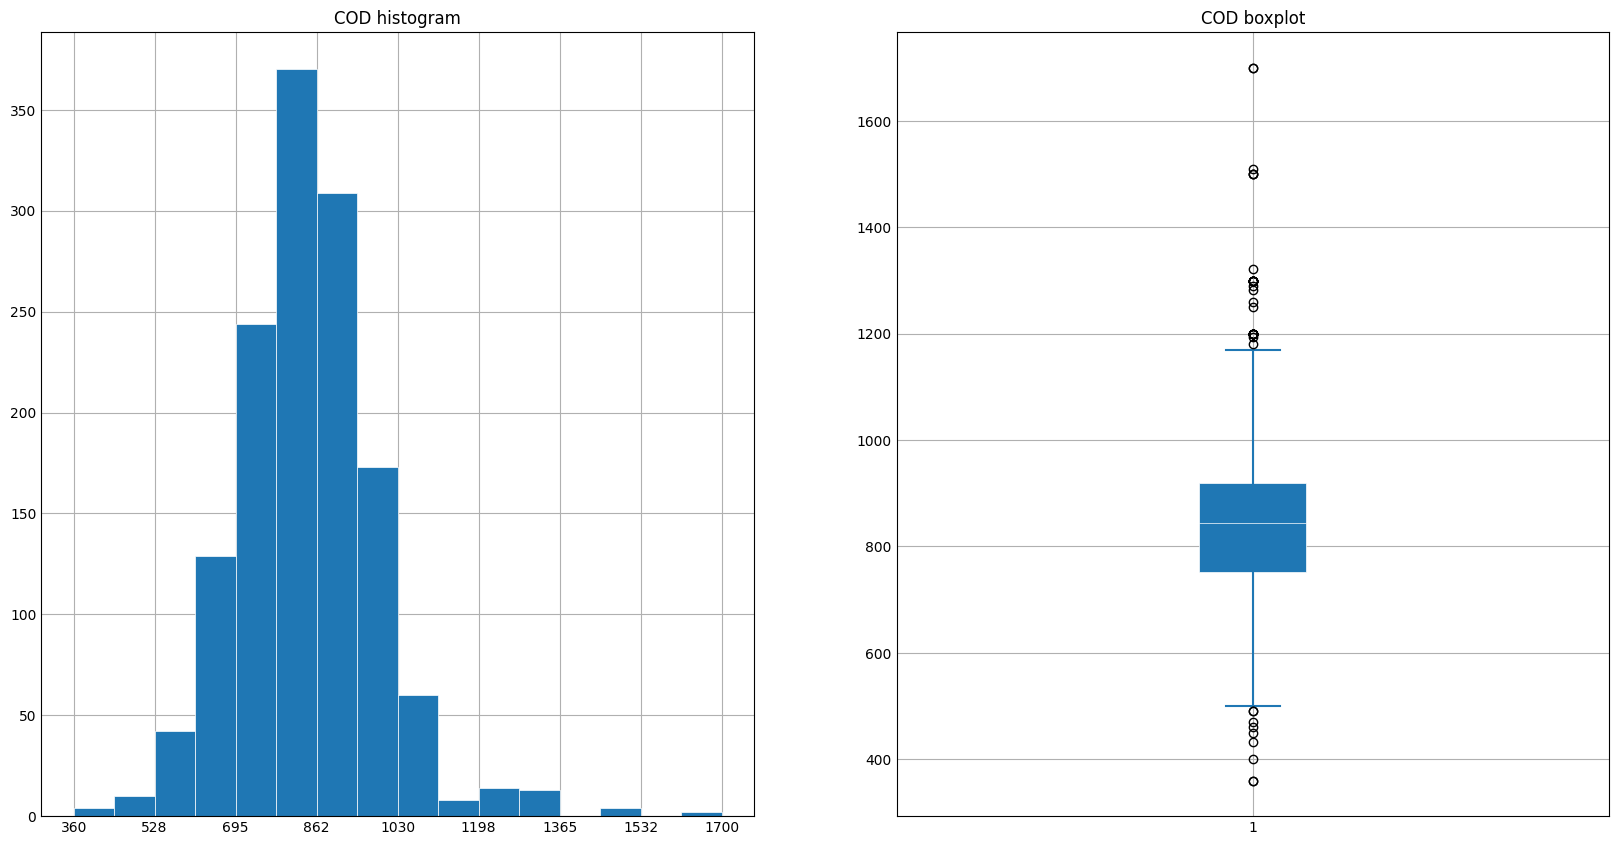

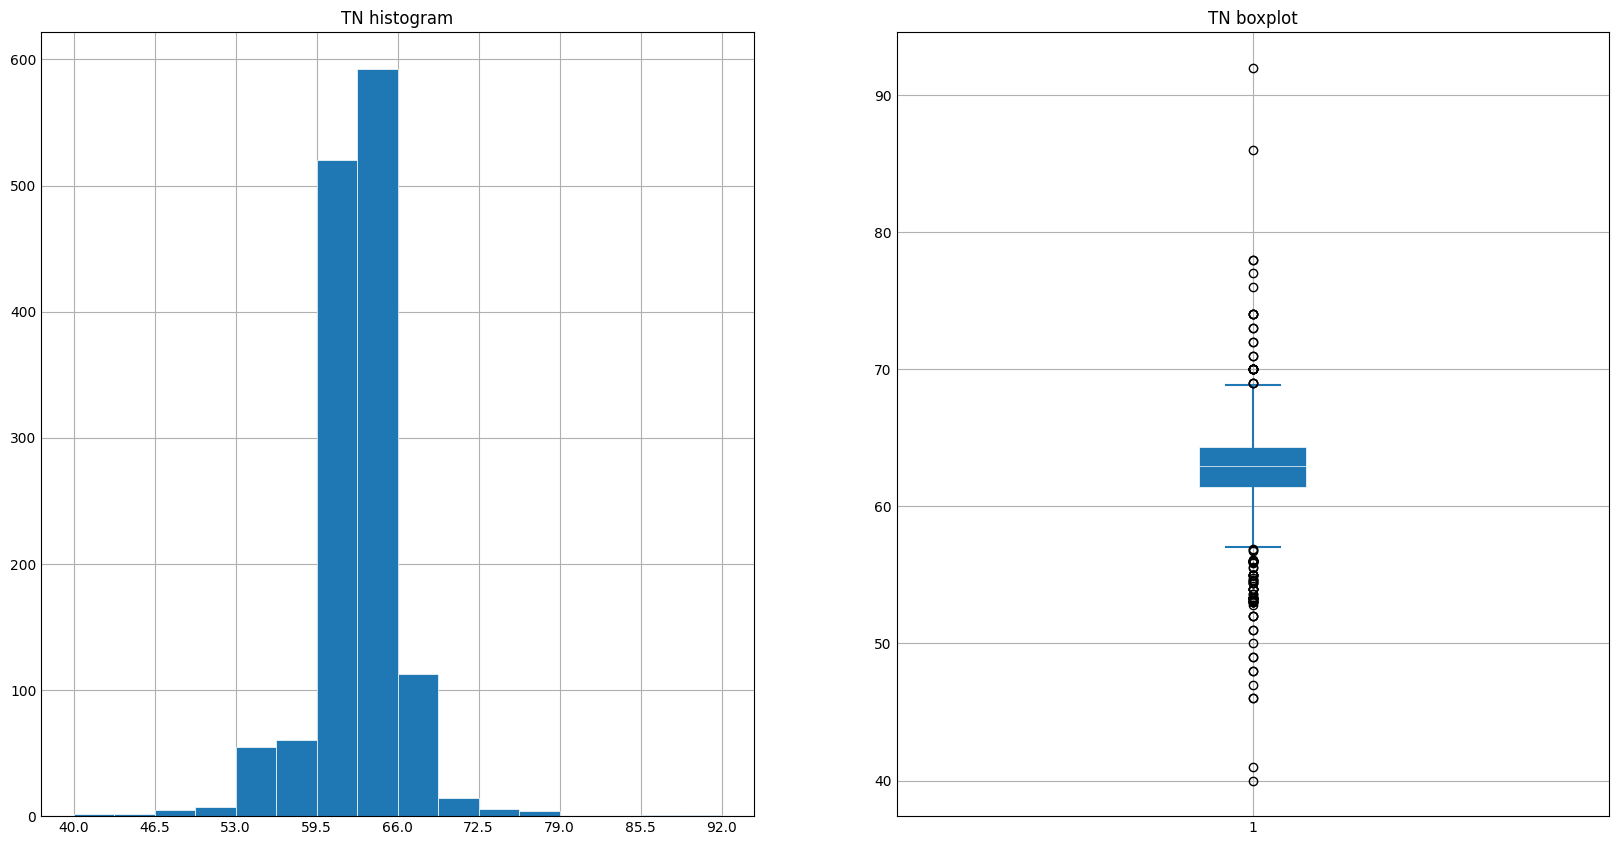

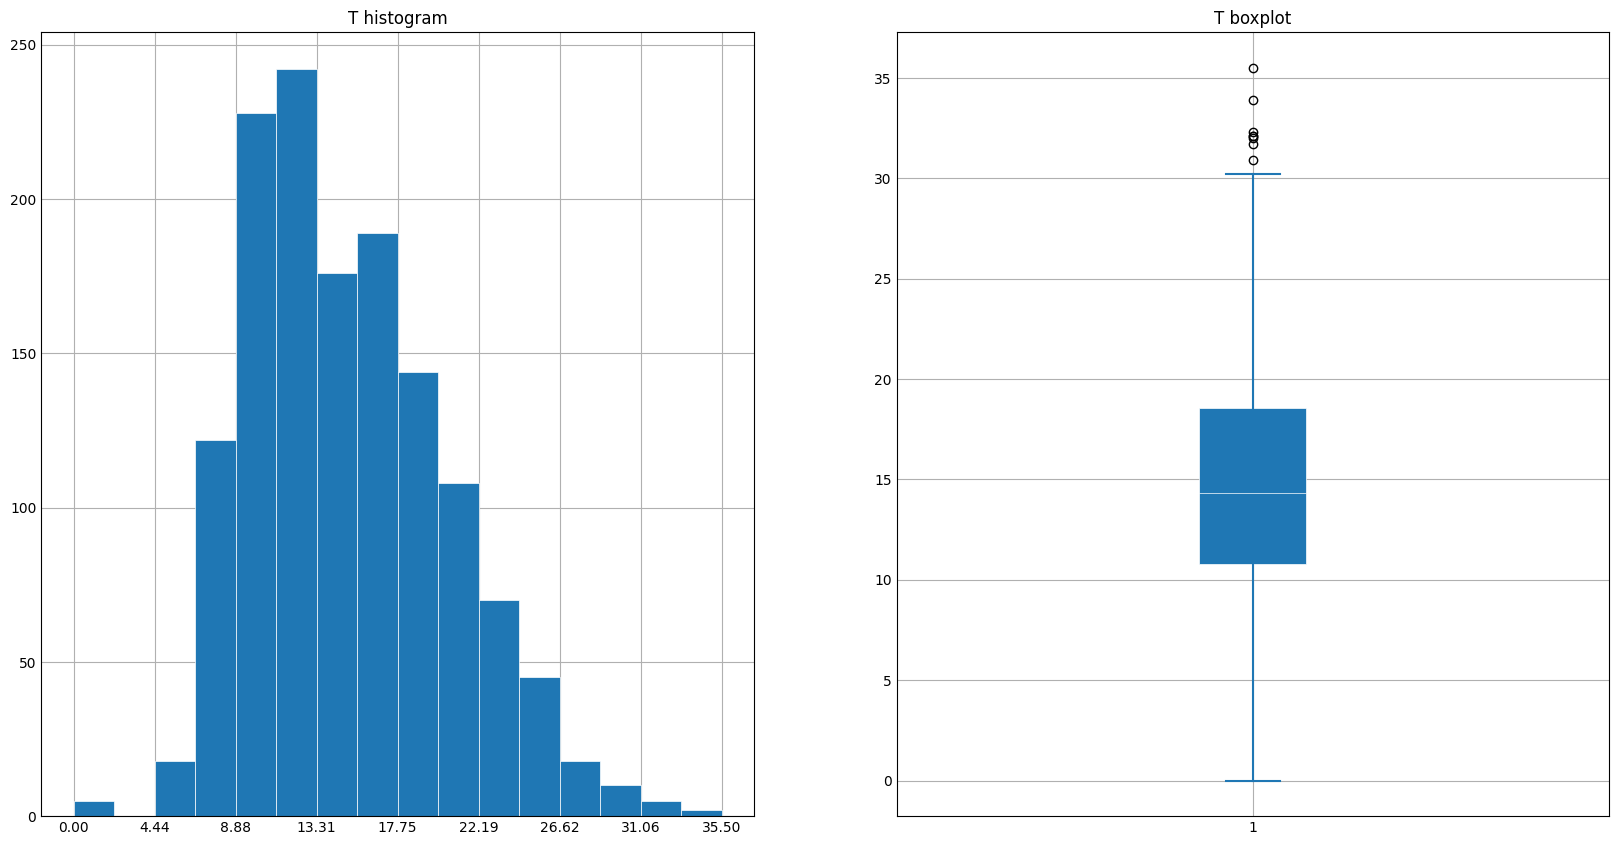

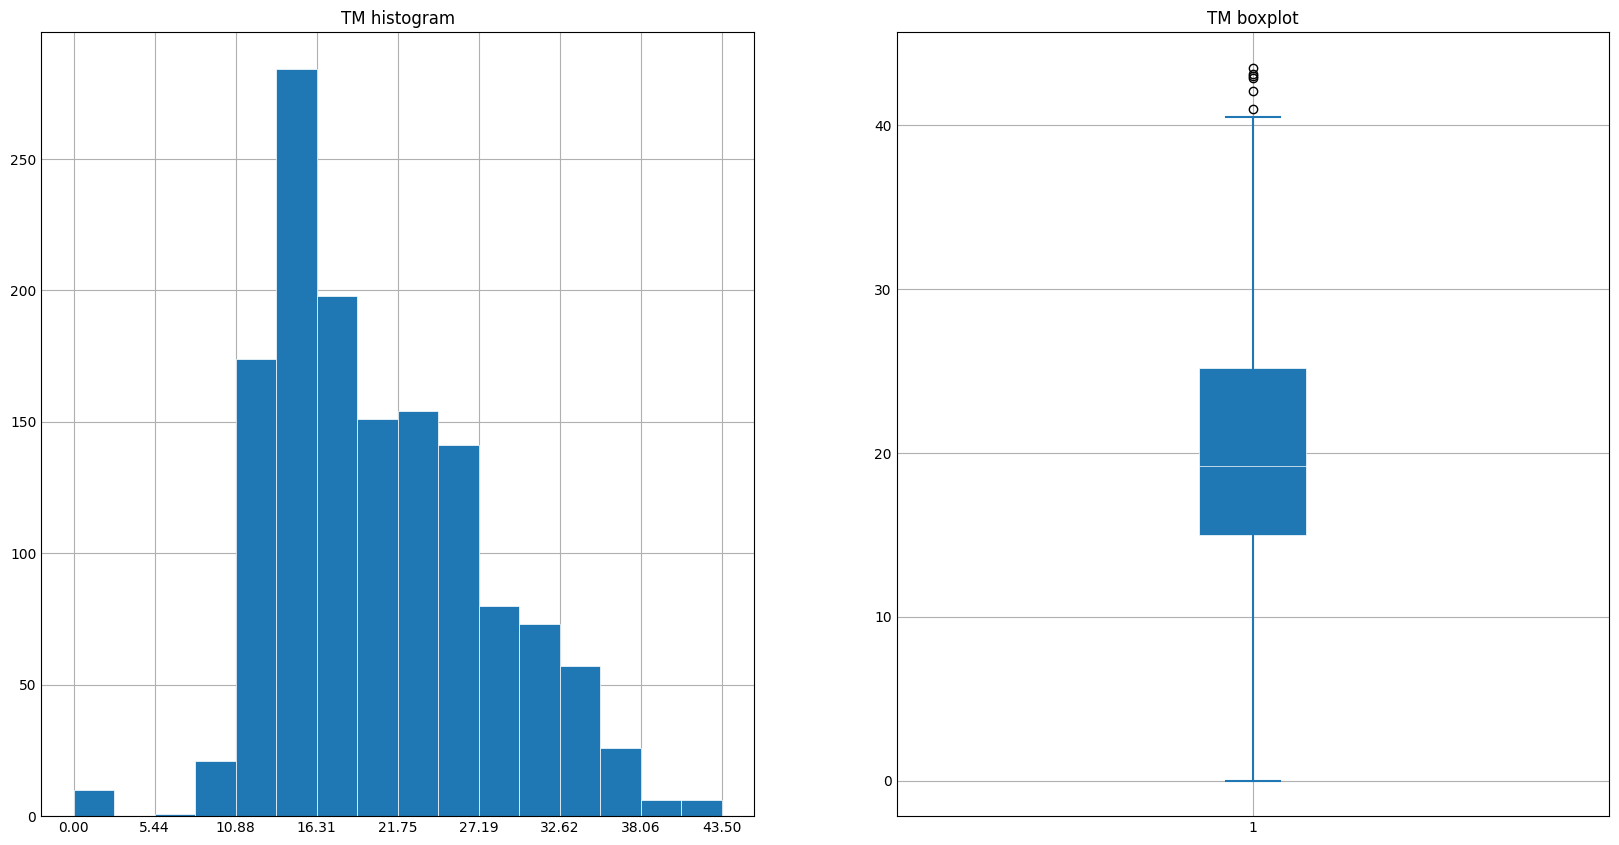

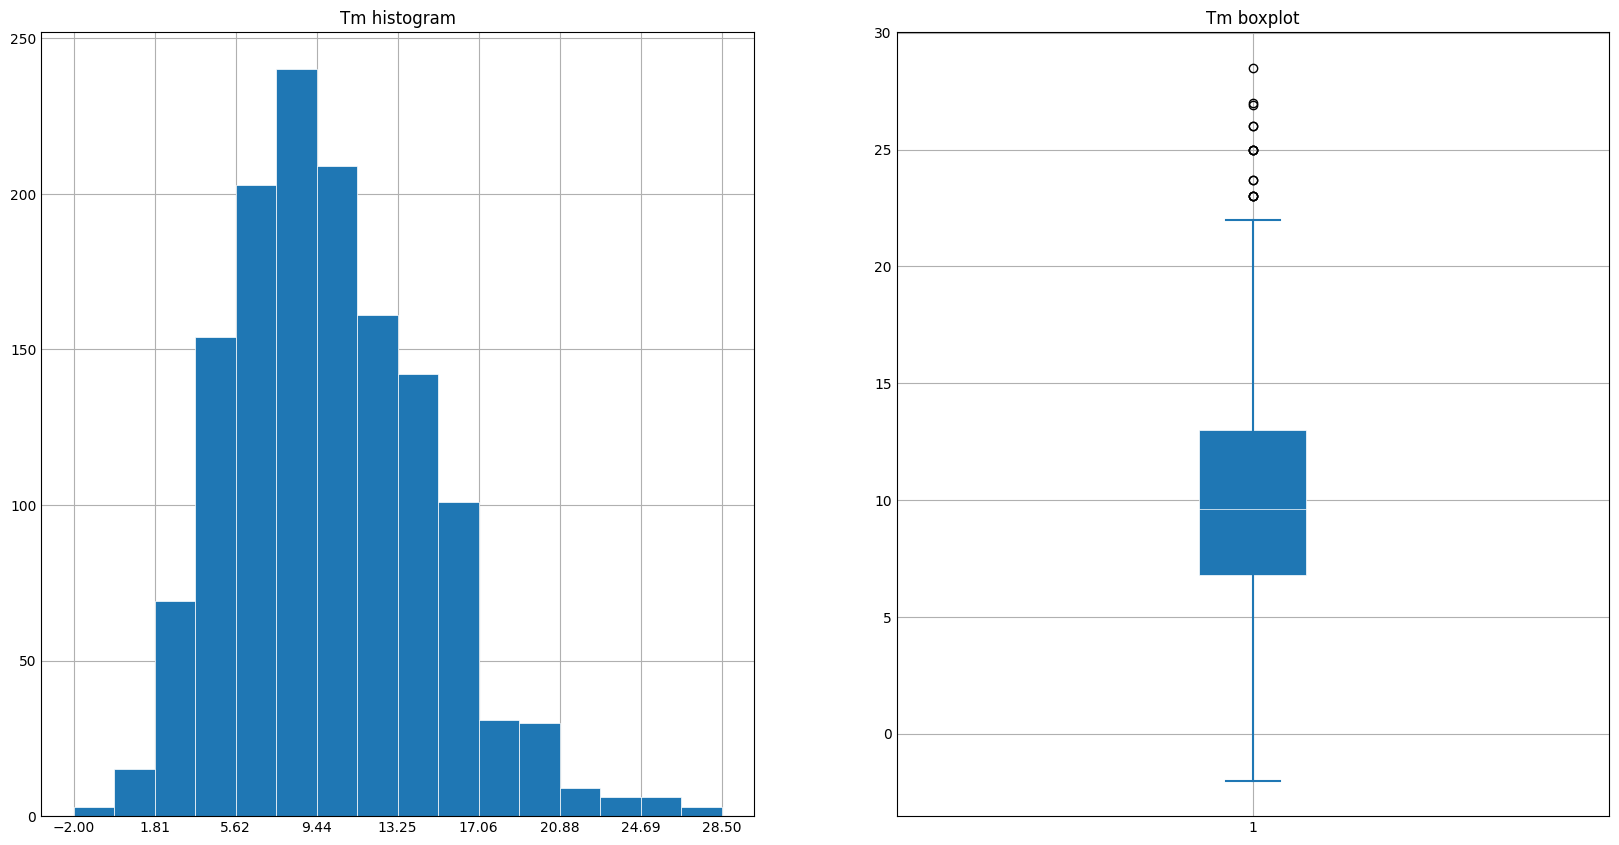

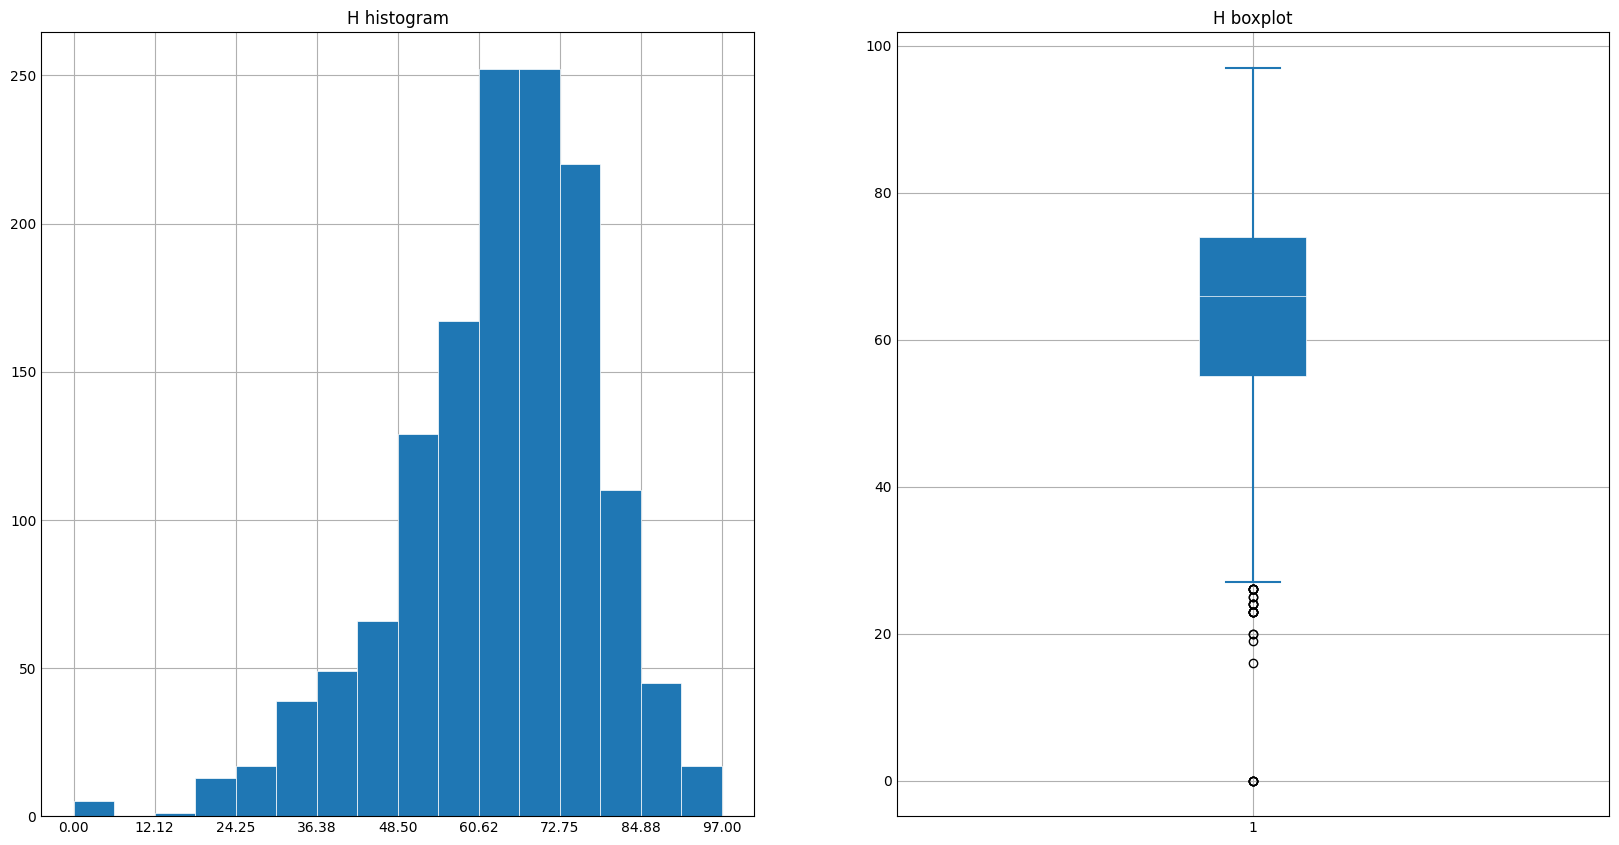

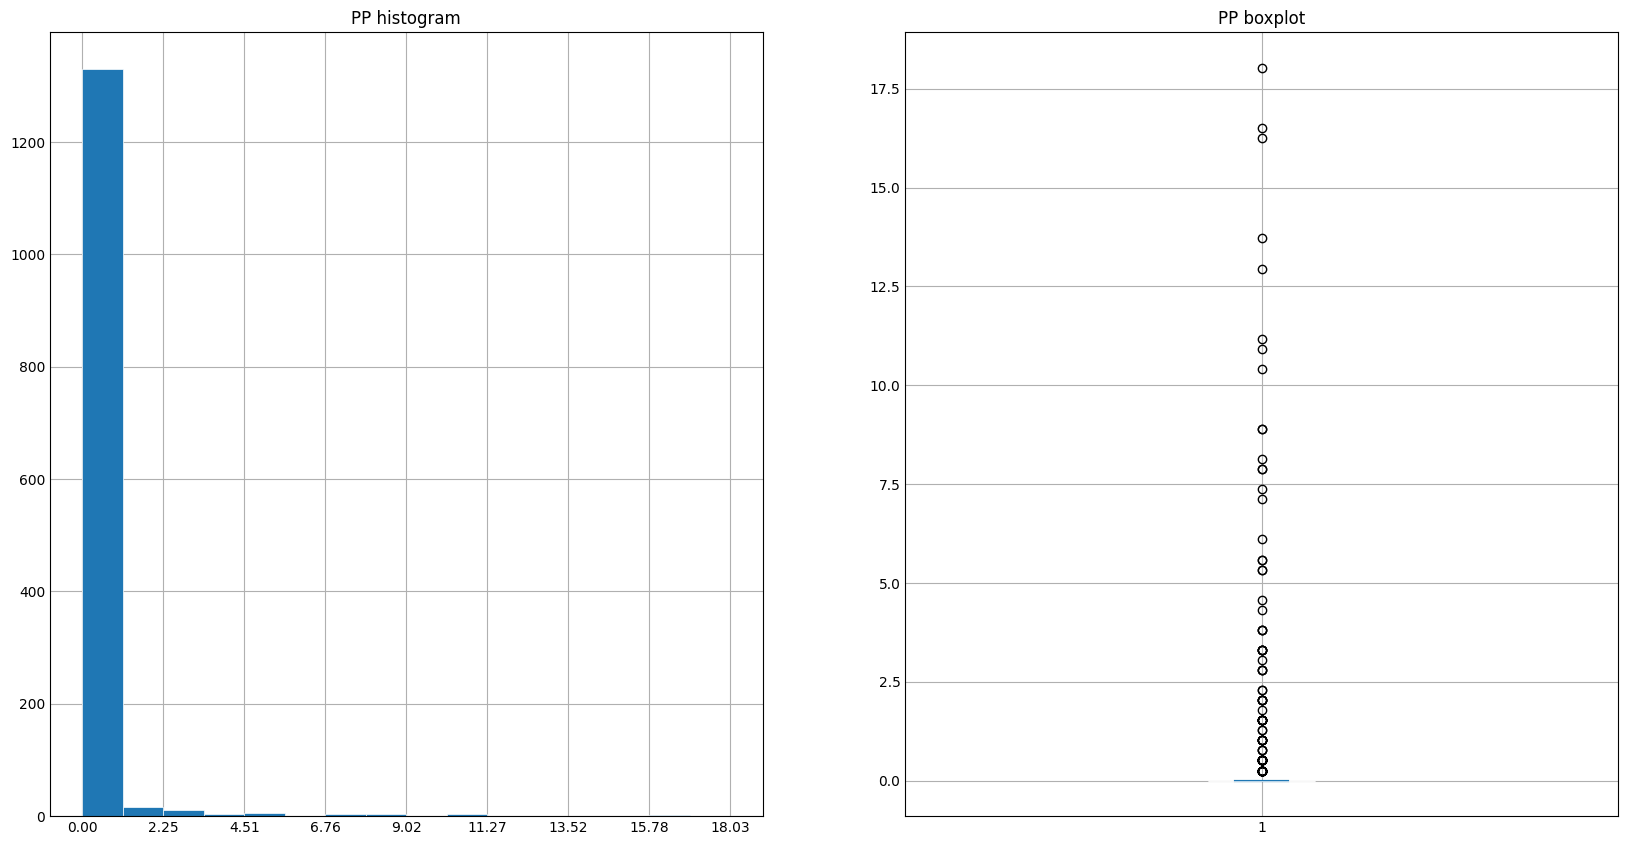

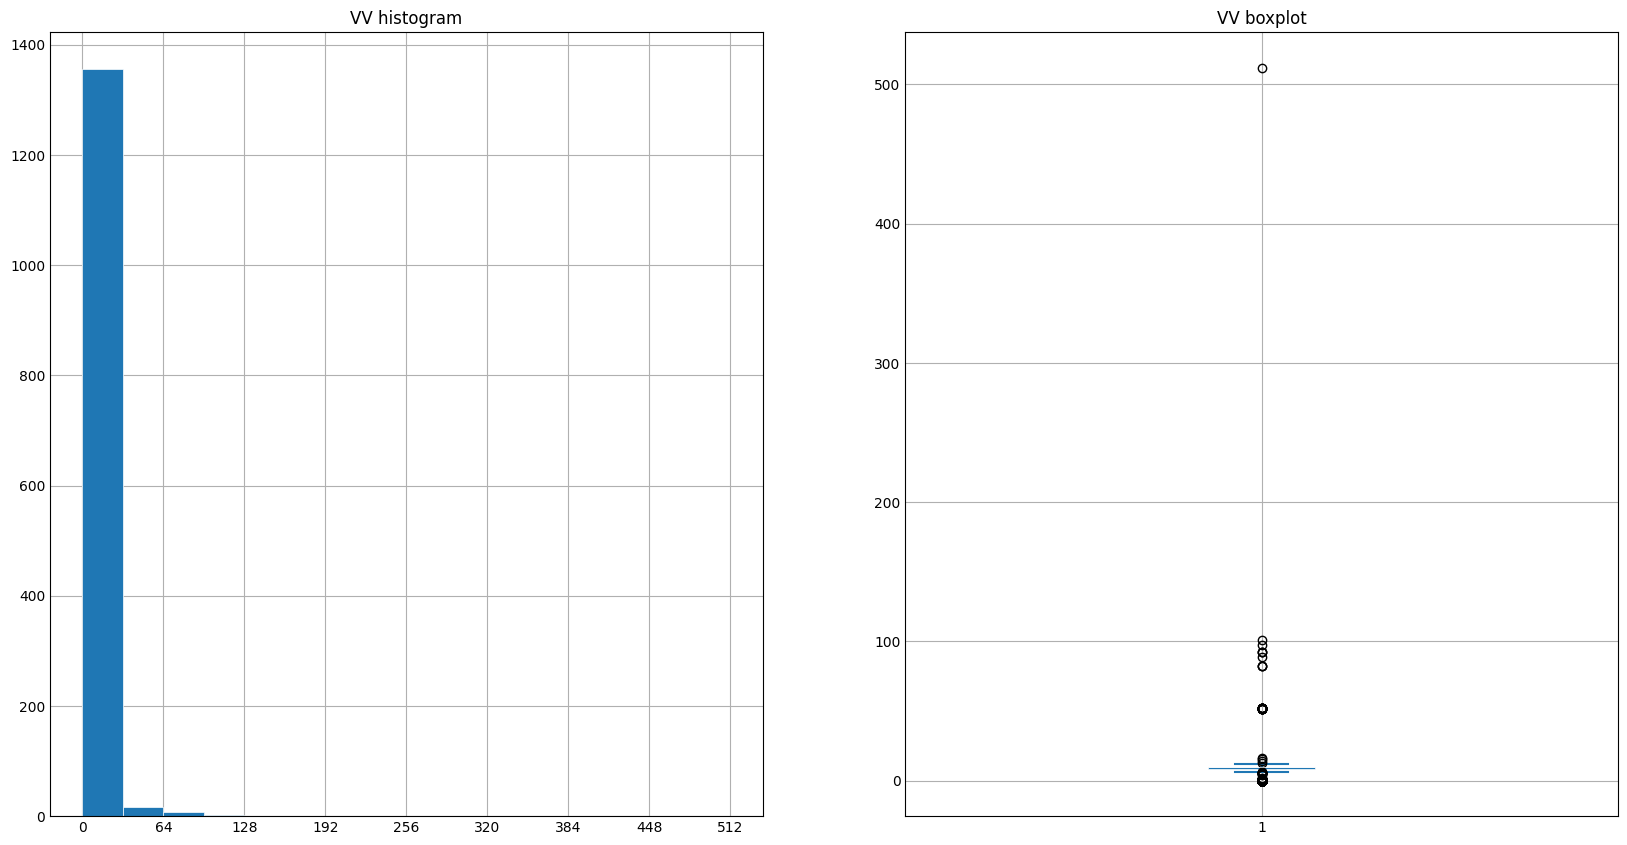

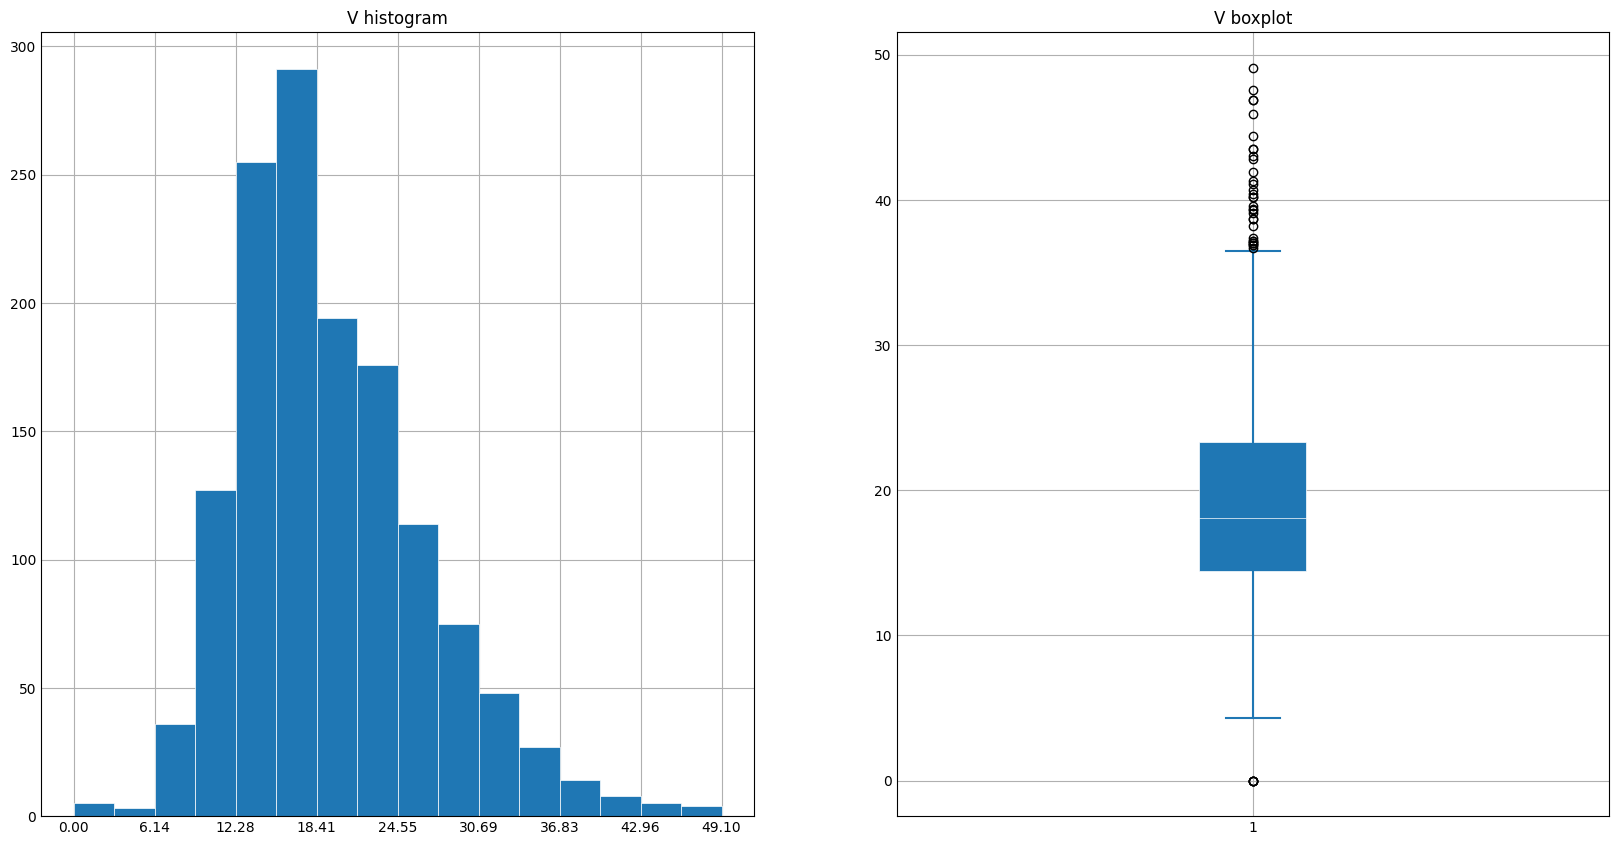

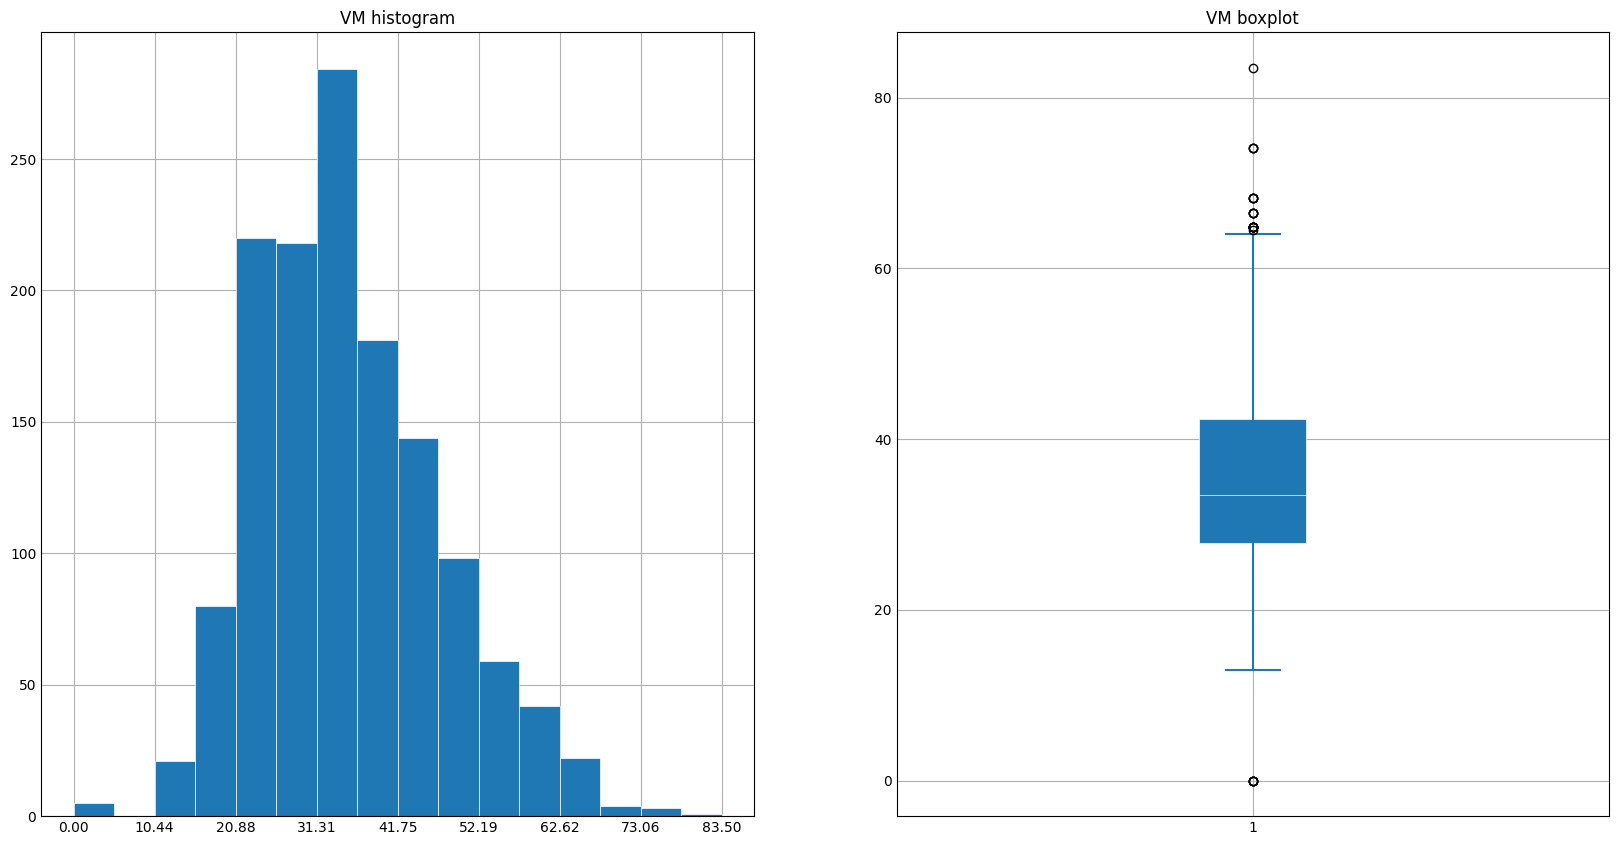

In [6]:
for i, predictor in enumerate(df.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(df[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::2], title=f'{predictor} histogram')
    axs[1].boxplot(df[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

analyze_dataset(df)

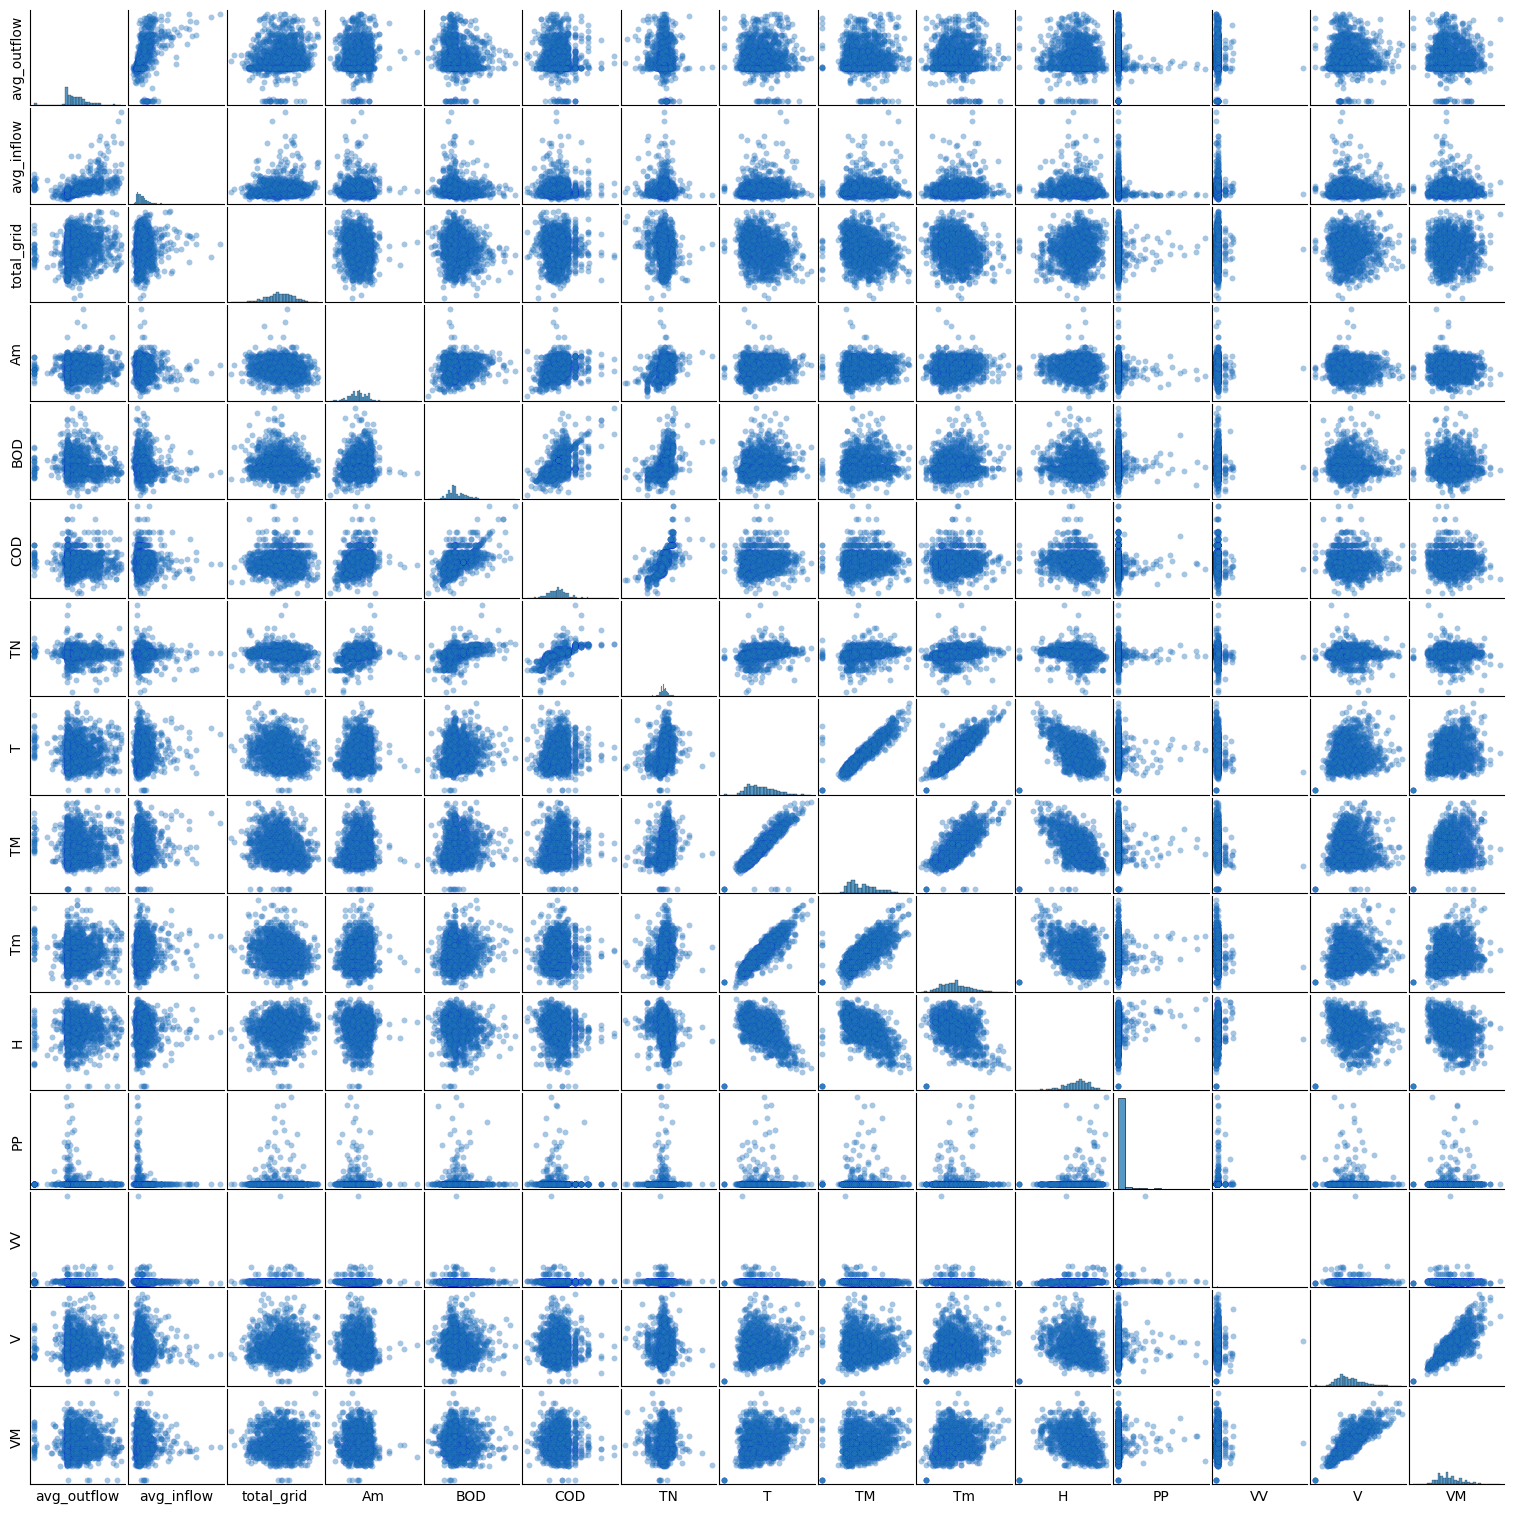

In [7]:
# Unconditional bi-variate analysis of the predictors

pairgrid = sns.pairplot(
    df,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                # marker size
        alpha=0.4,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",    # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

name           mean  standard_deviation  skewness
1   avg_outflow       4.174099            1.317259  0.457775
2    avg_inflow       4.728771            1.675827  2.951478
3    total_grid  280919.129771        45958.531755 -0.241447
4            Am      35.859626            8.906758  0.495592
5           BOD     298.956107           35.860668 -1.249566
6           COD     679.385496           84.219428 -1.000744
7            TN      59.331553            3.833136 -1.729075
8             T      13.698855            5.192483  0.817627
9            TM      18.746565            6.734190  0.864498
10           Tm       9.409160            4.557869  0.649237
11            H      66.919847           14.439637 -0.999657
12           PP       0.236450            1.280395  7.792757
13           VV       9.295038           10.893209  5.217460
14            V      19.897710            7.126605  1.009574
15           VM      35.591221           11.247101  0.891108

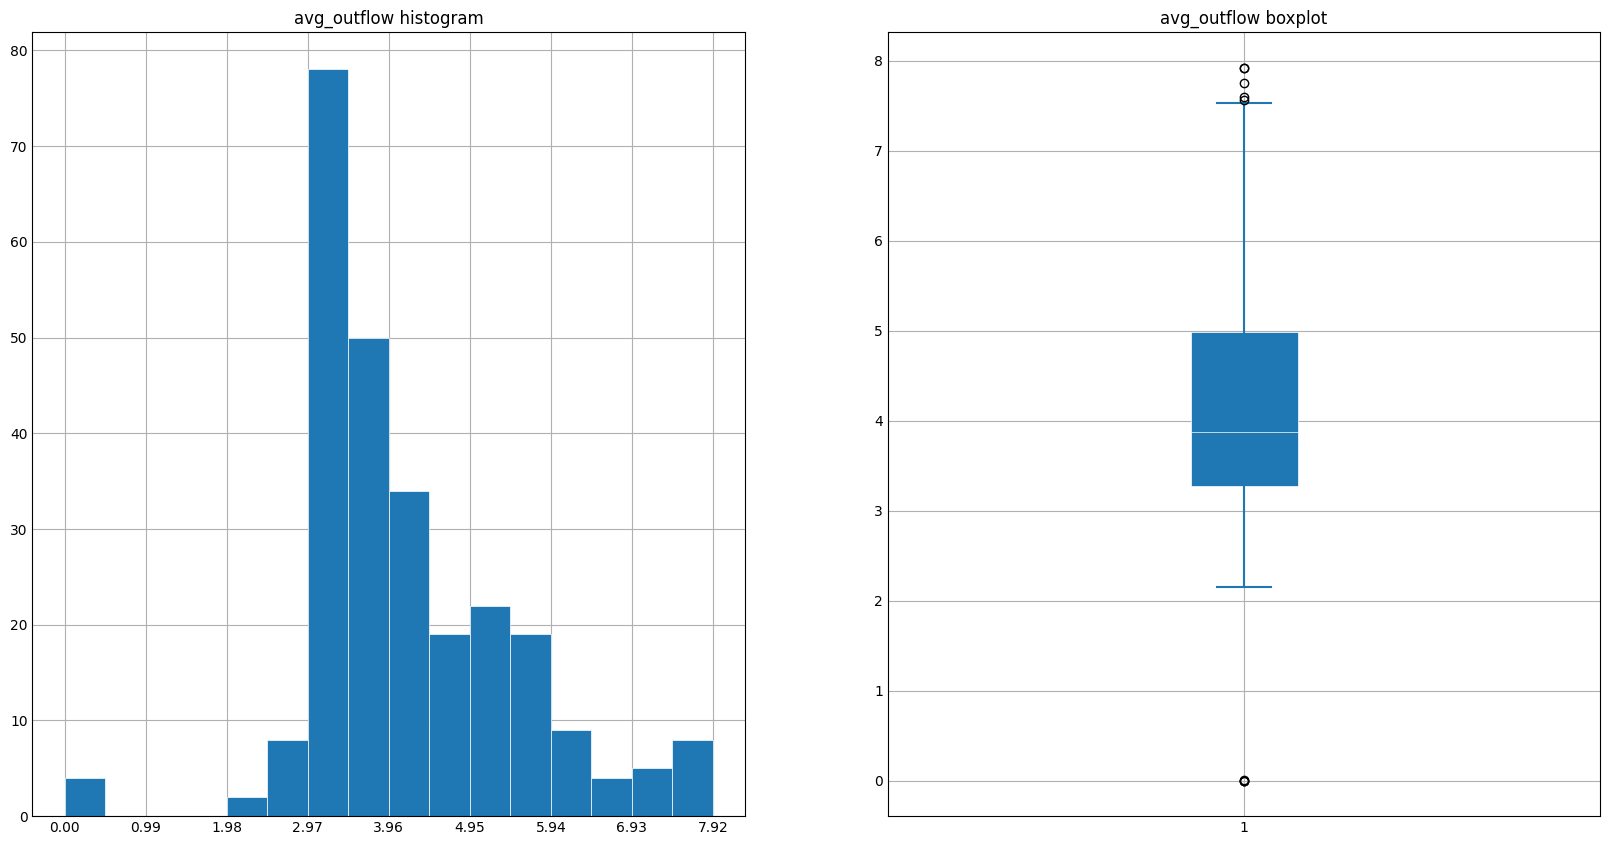

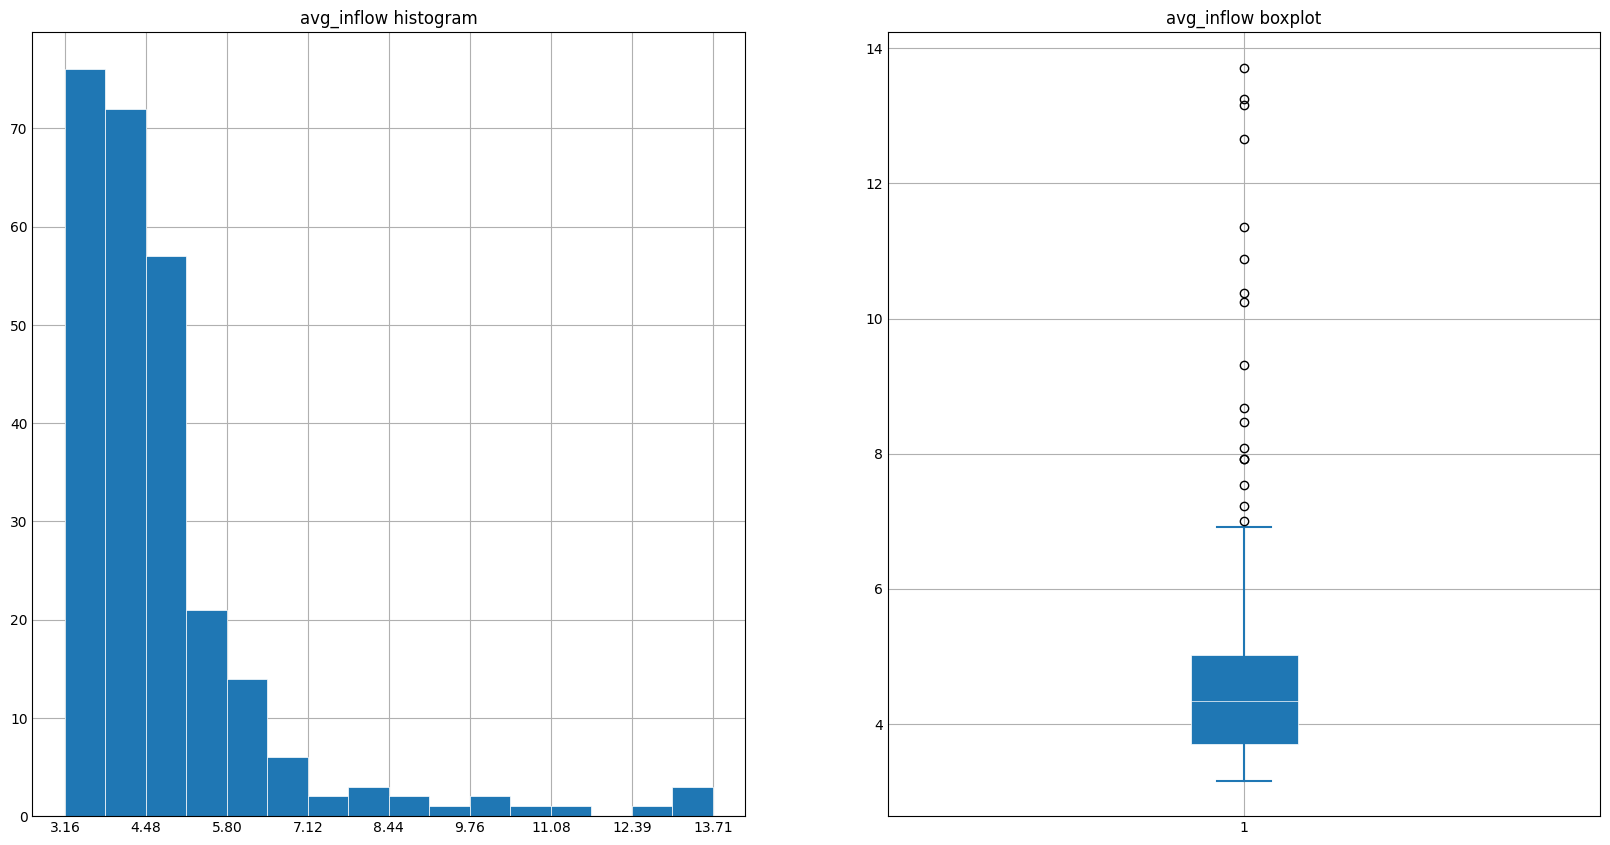

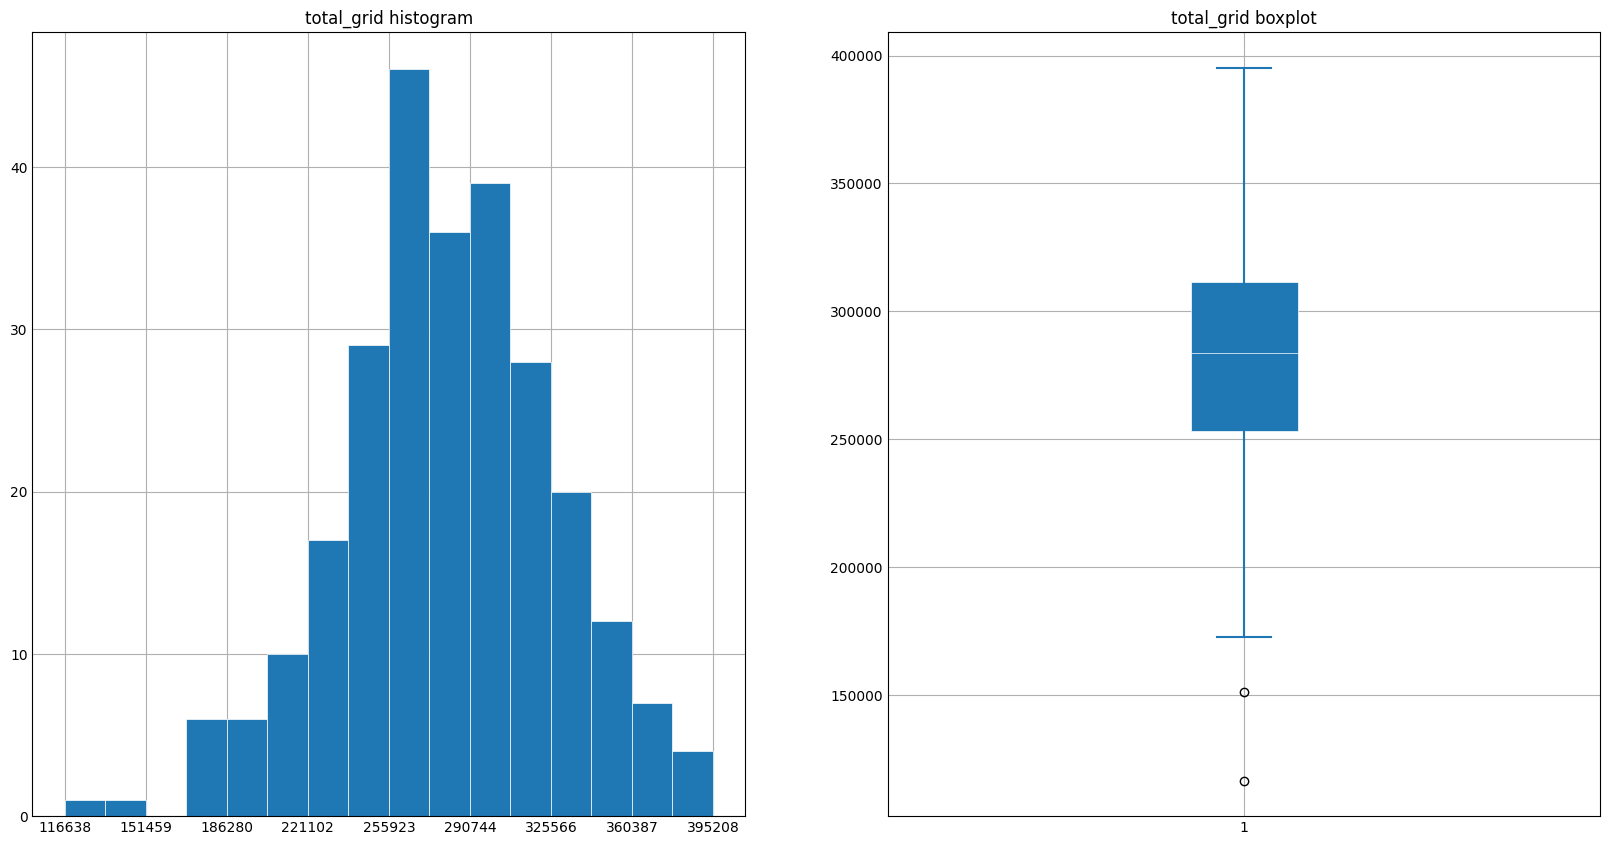

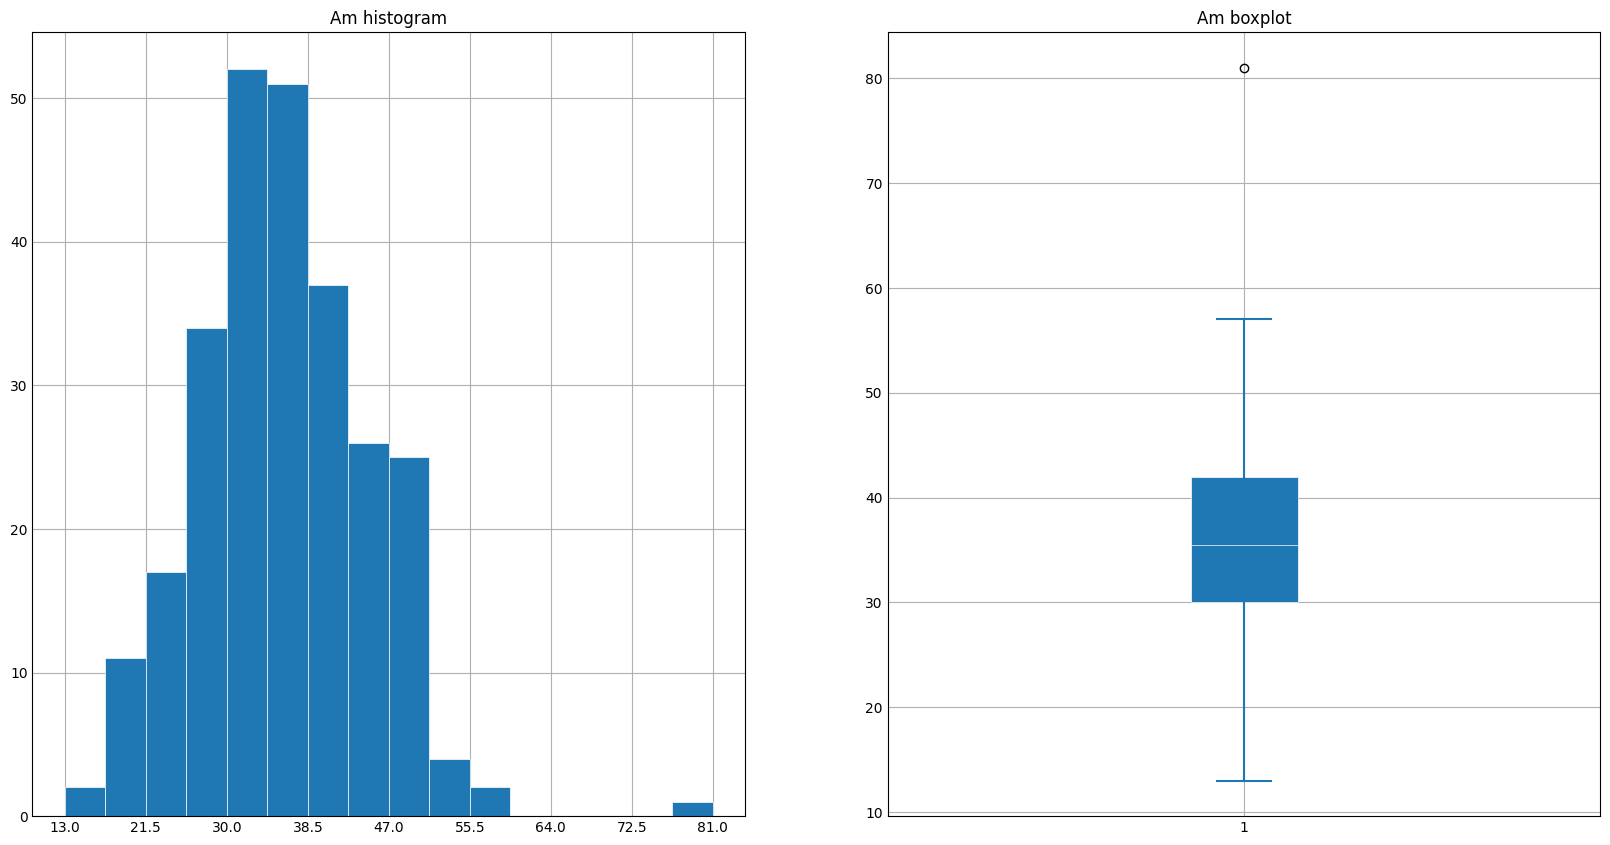

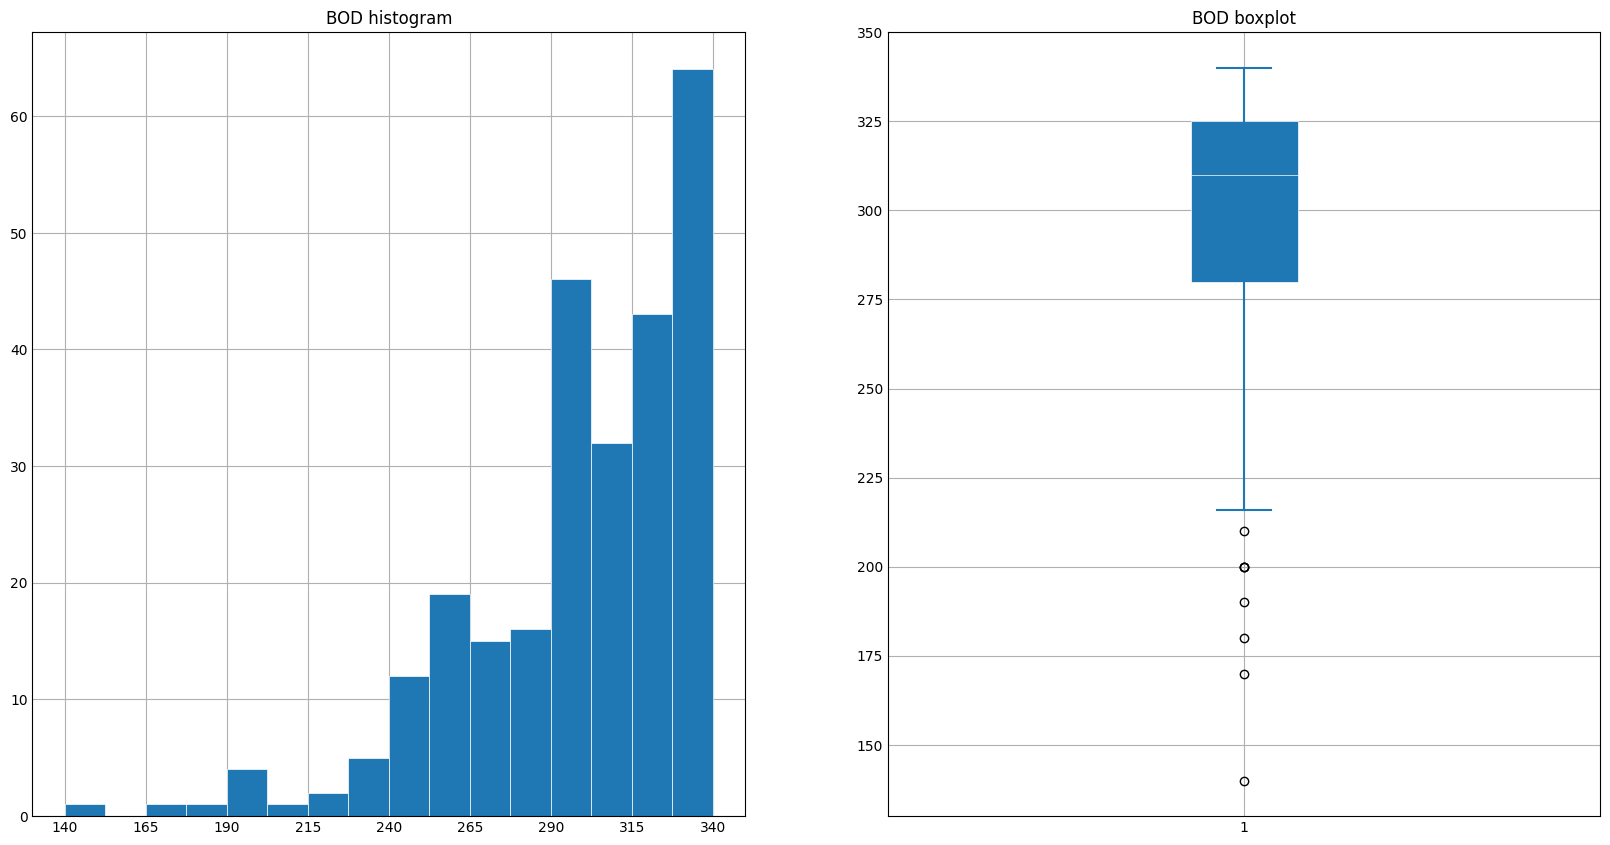

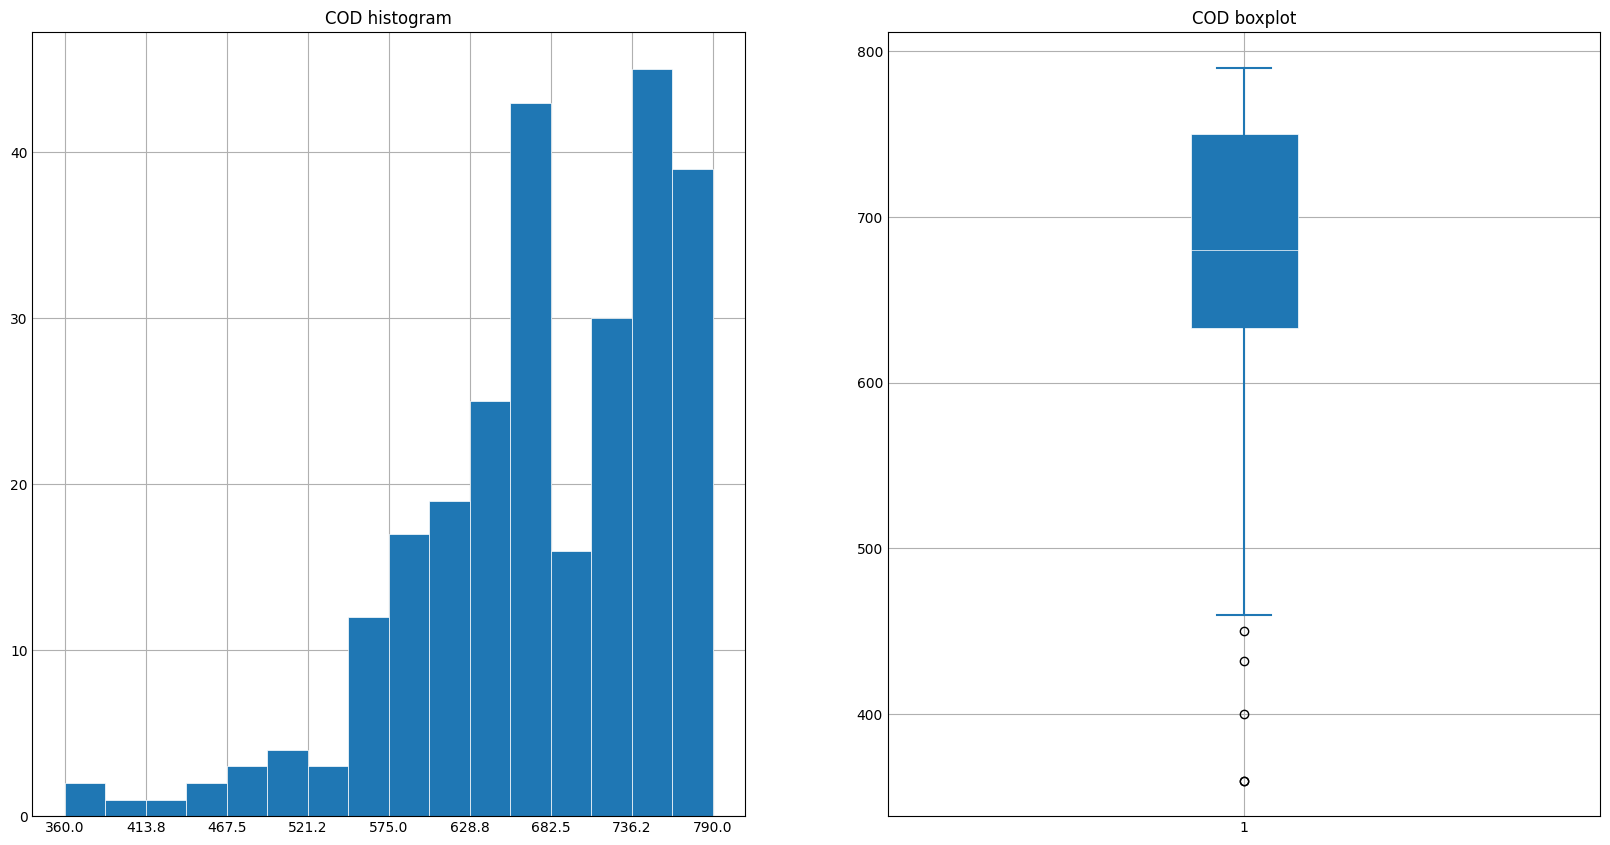

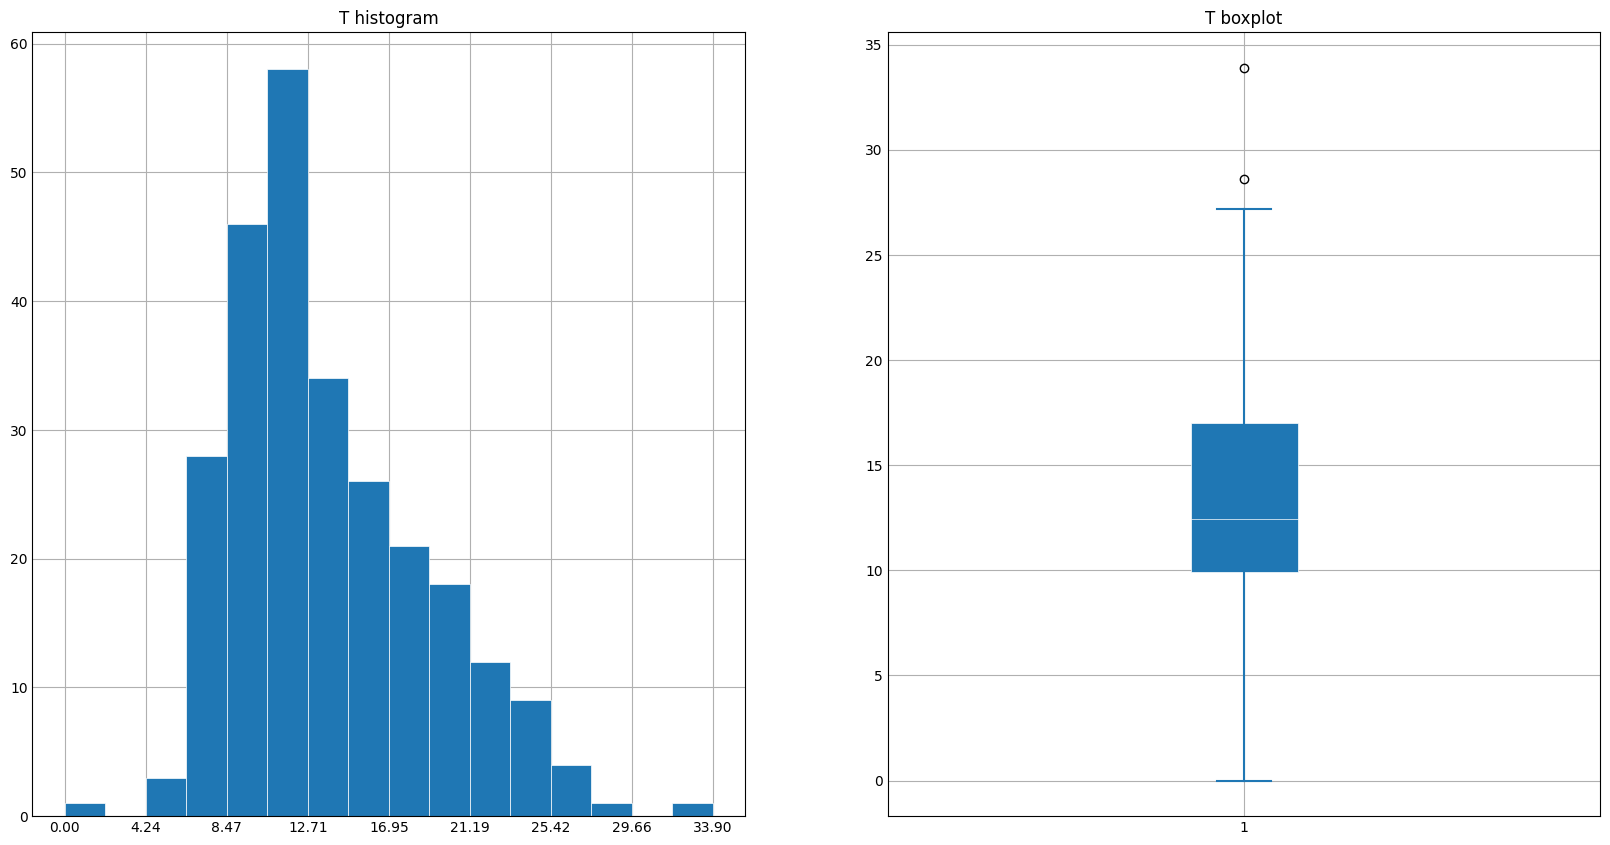

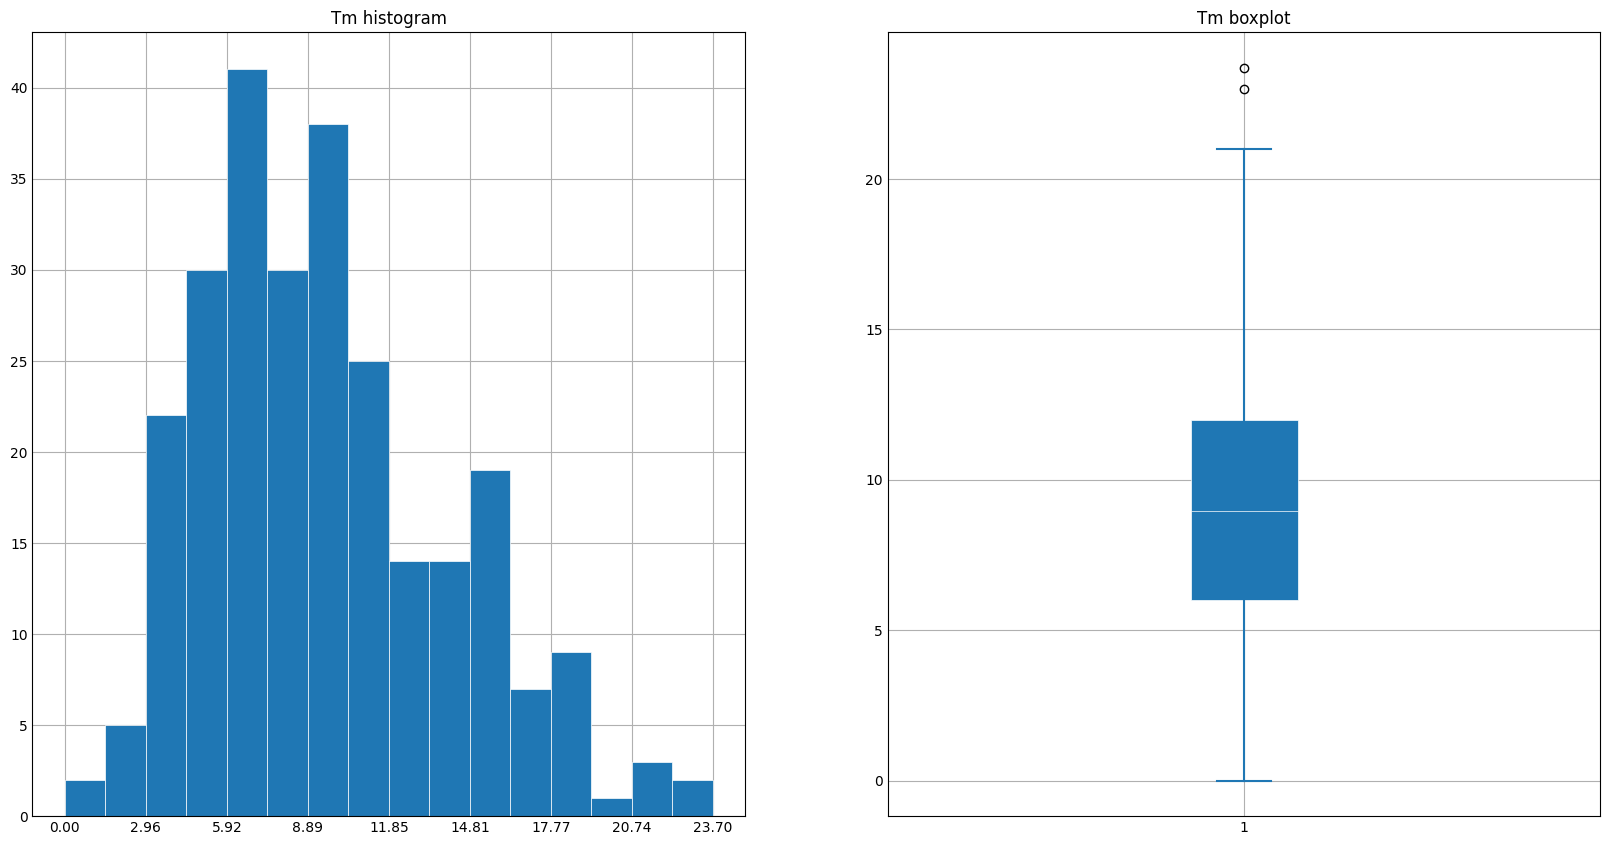

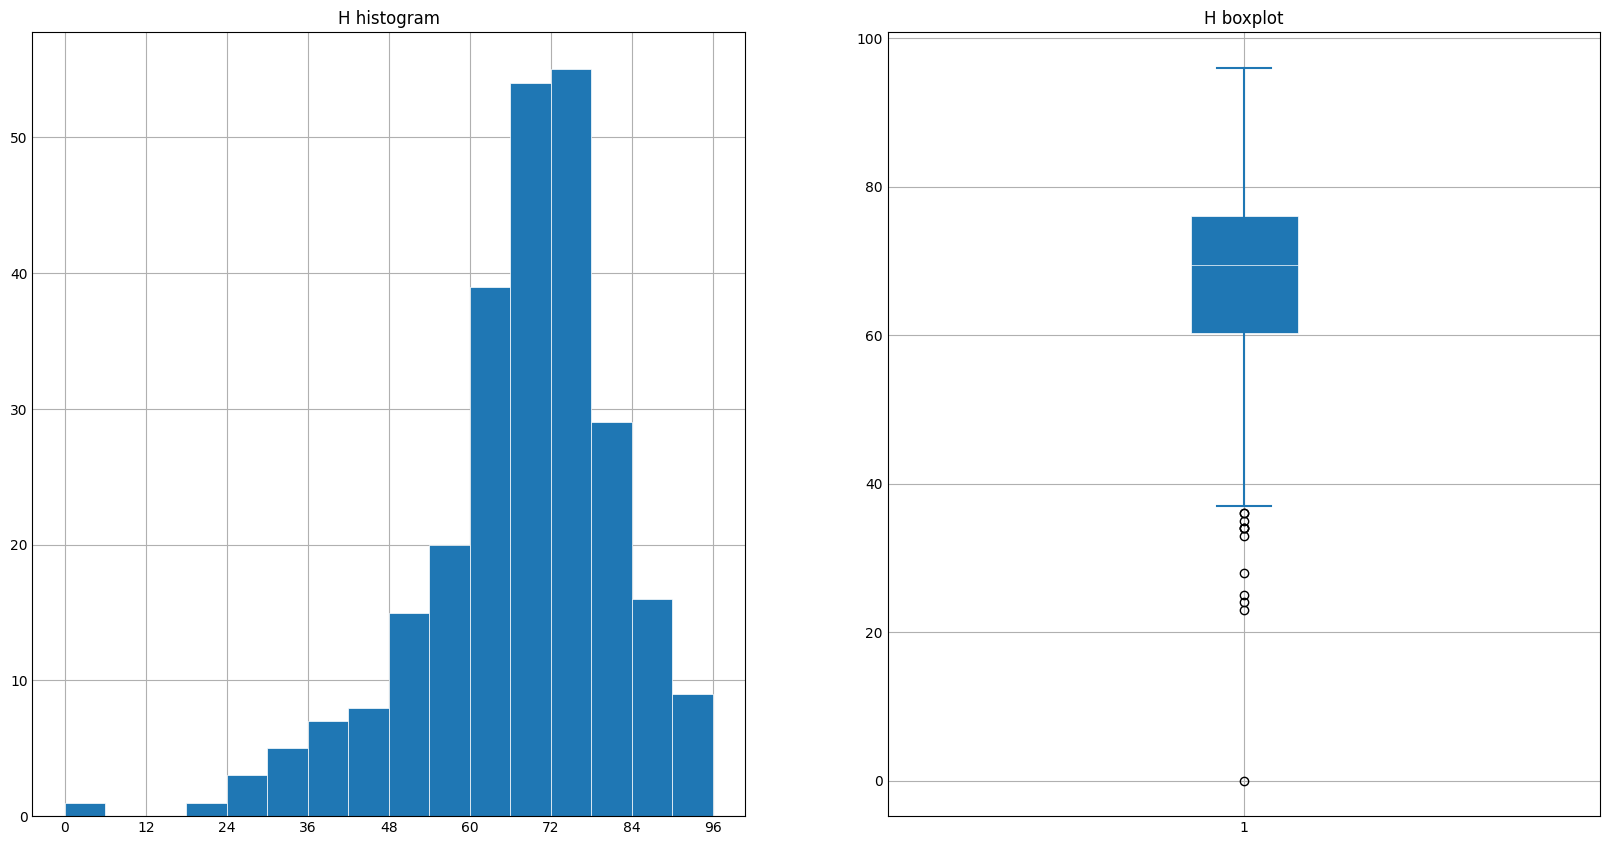

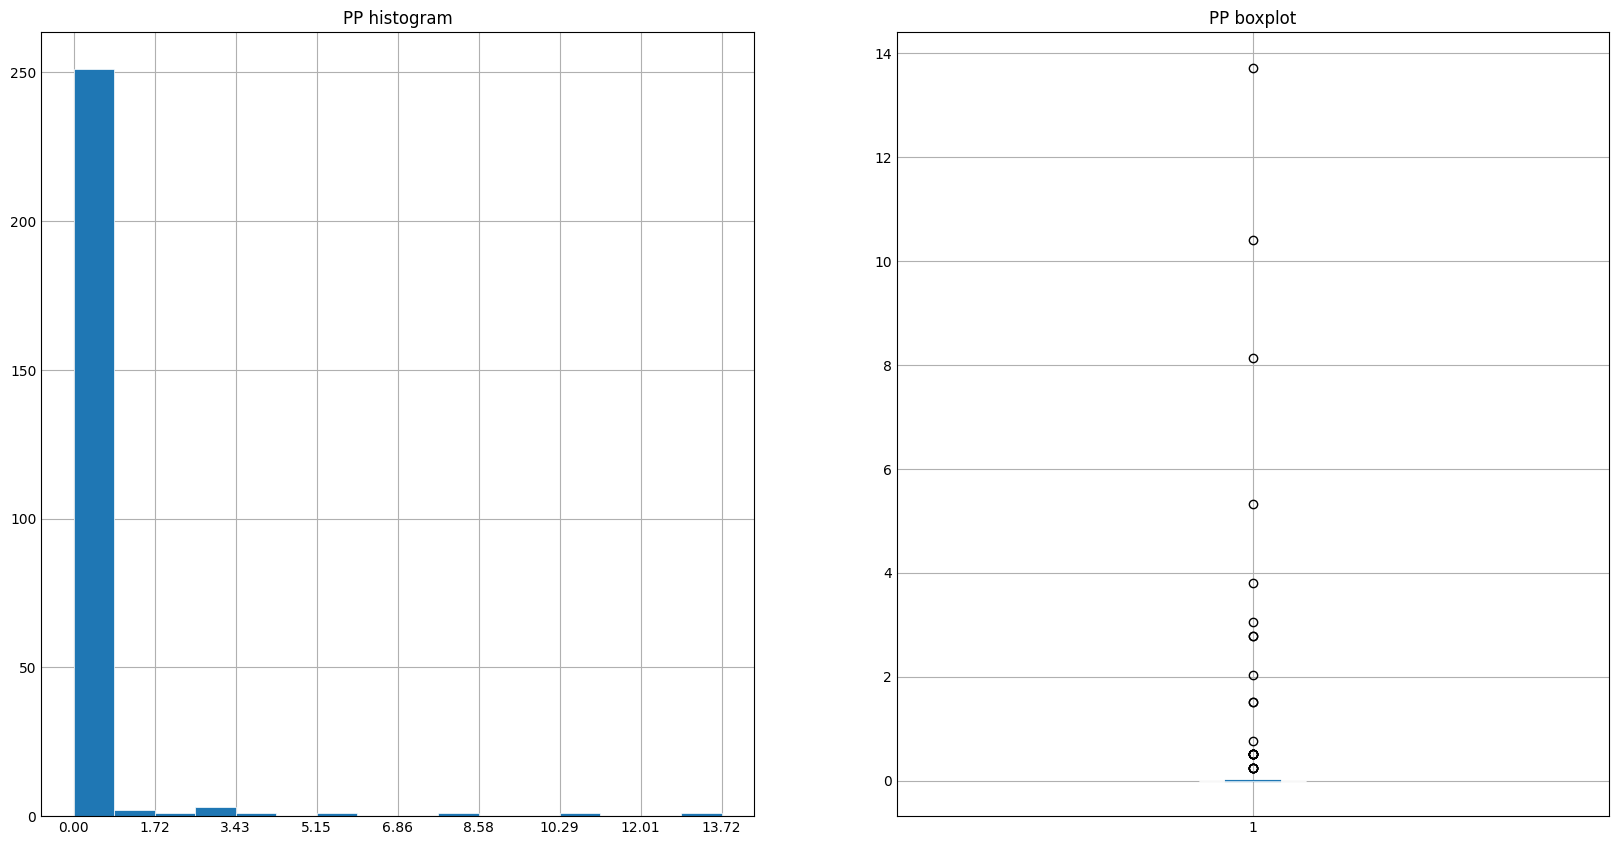

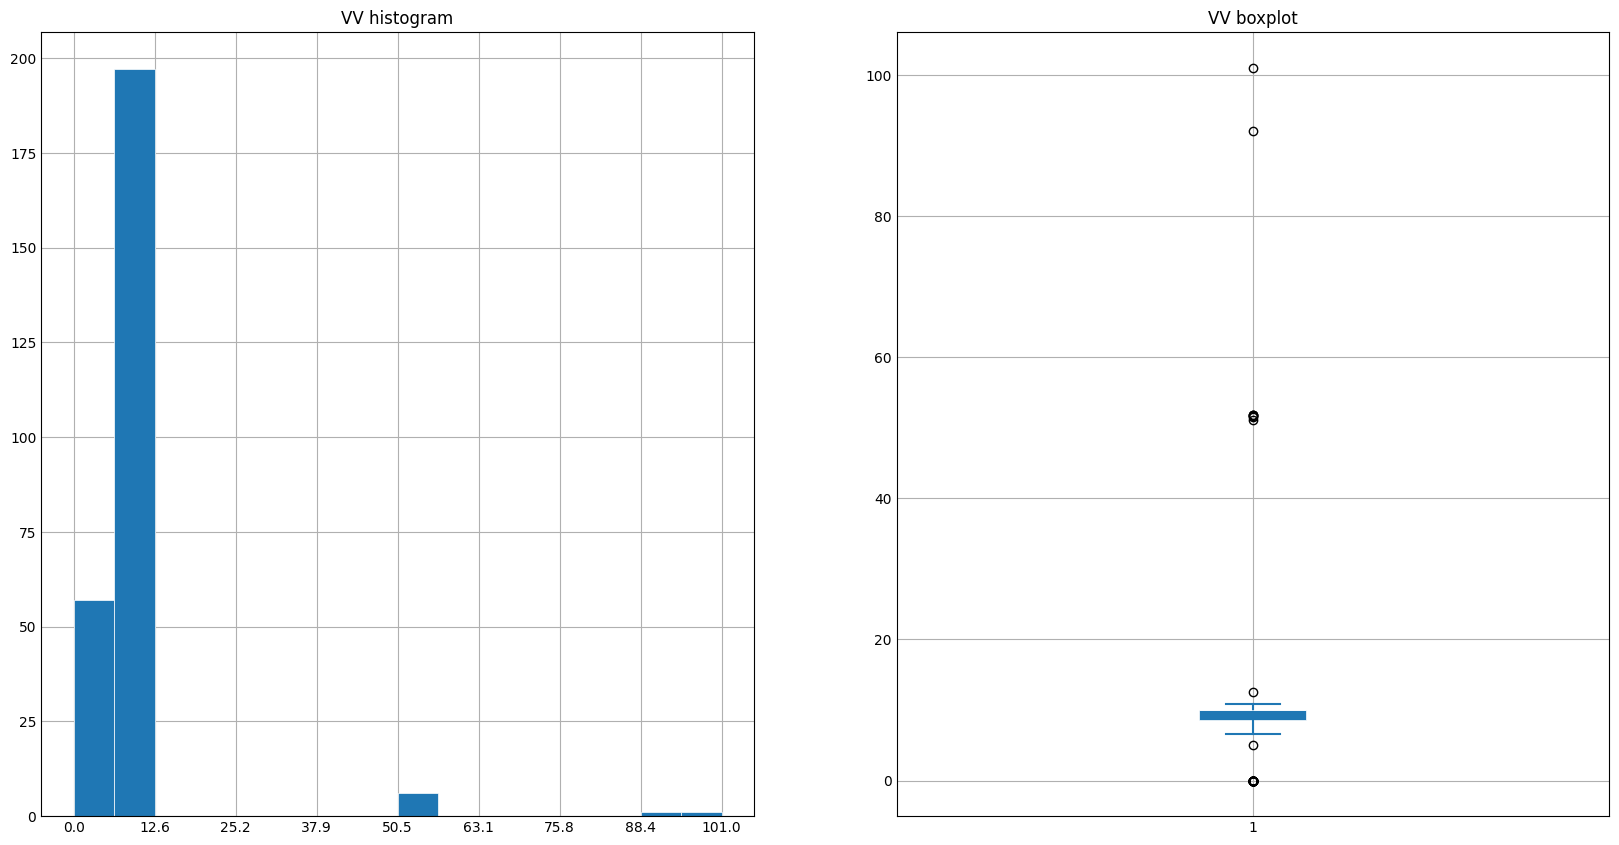

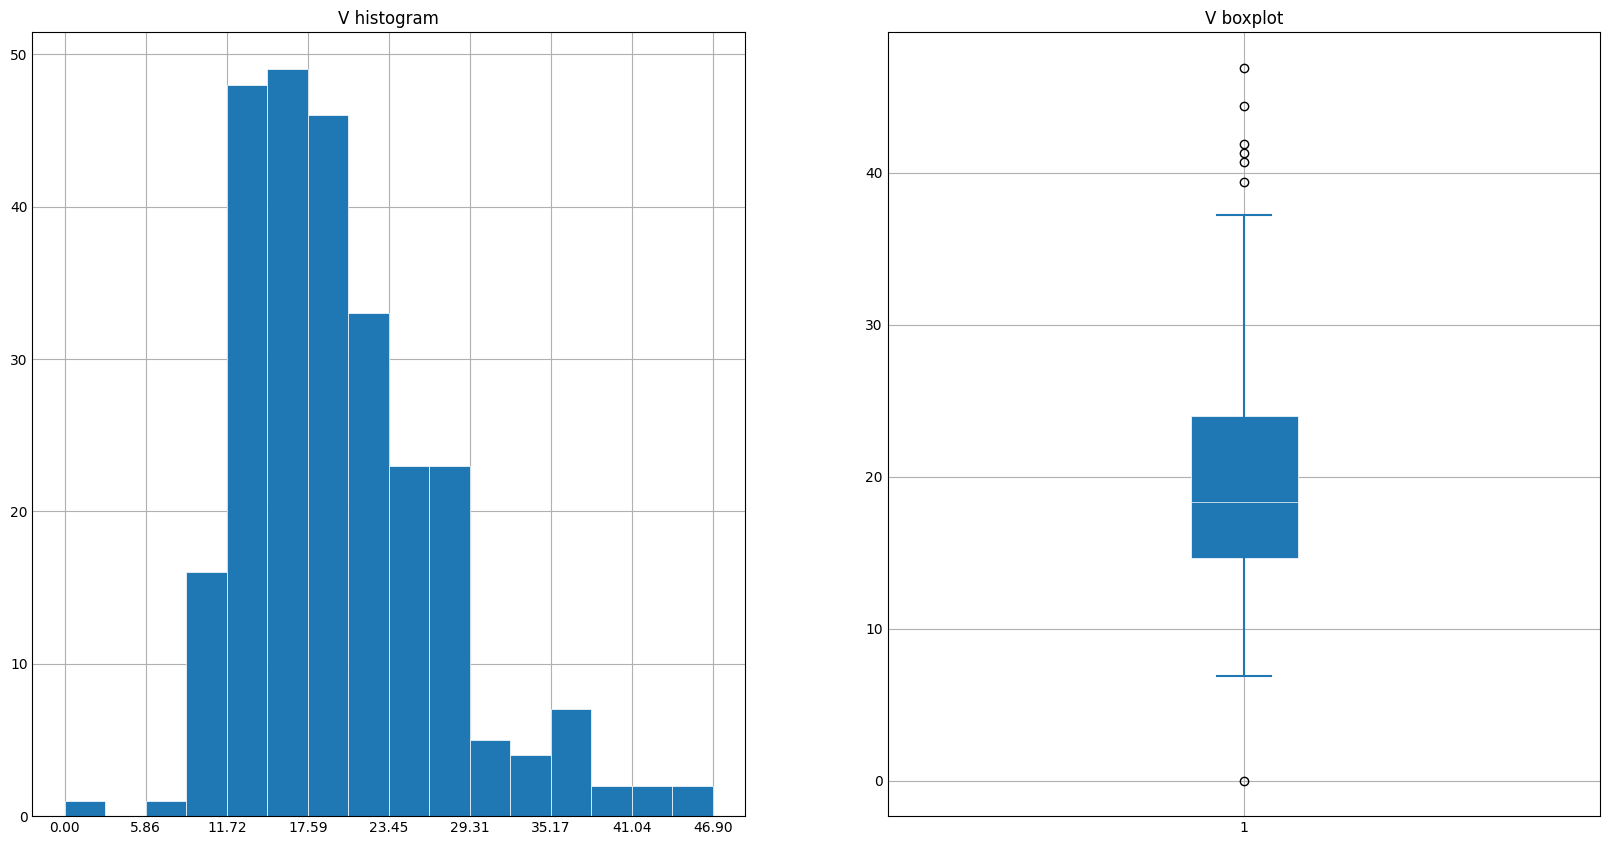

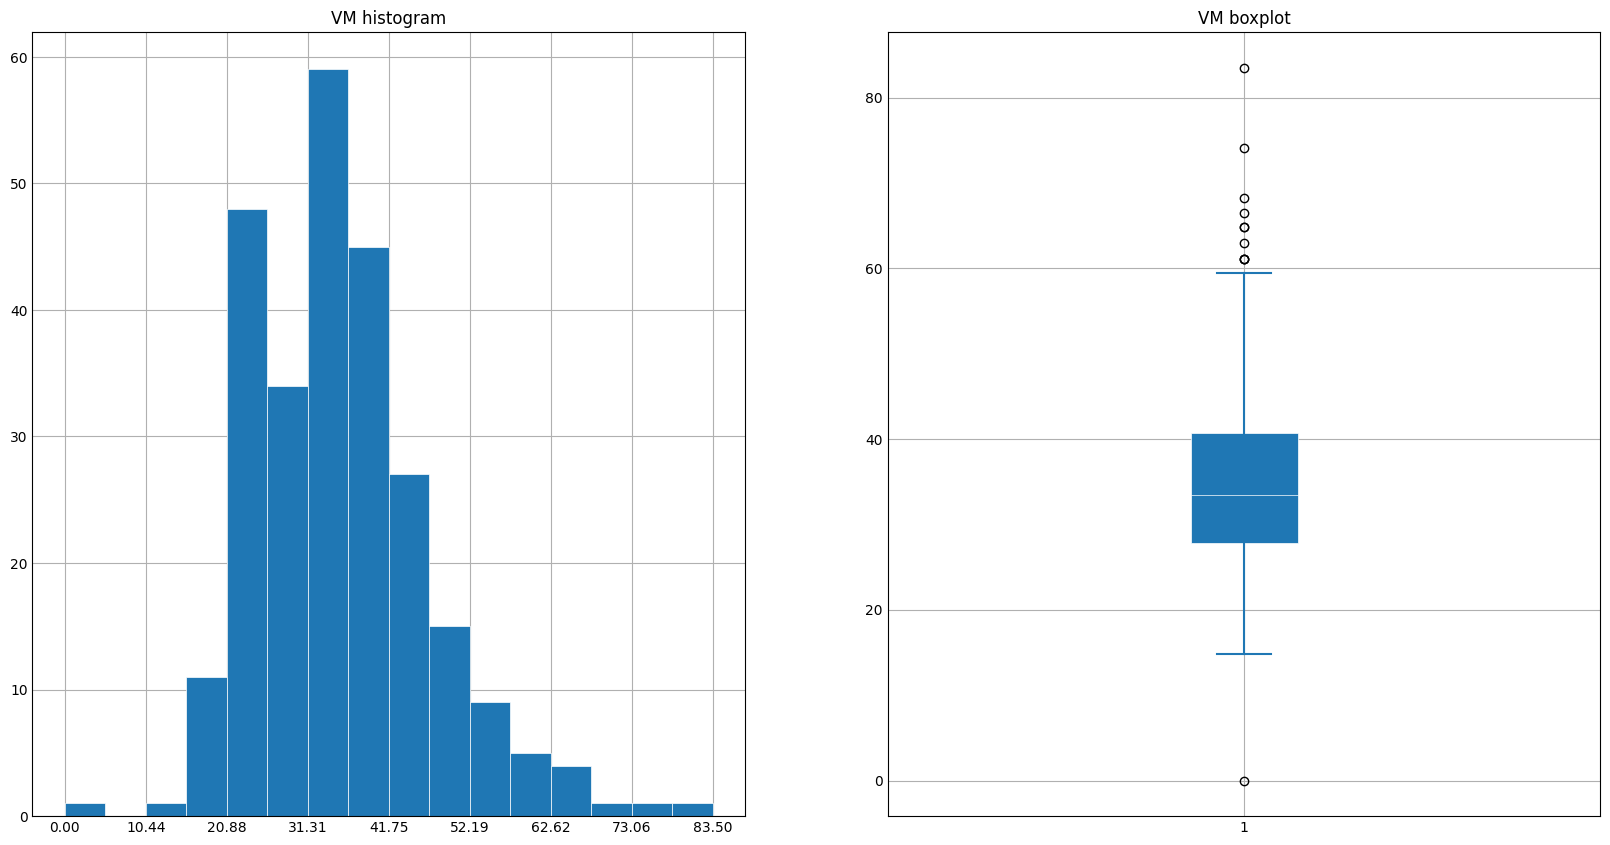

In [8]:
# Tipo1 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo1.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo1[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::2], title=f'{predictor} histogram')
    axs[1].boxplot(tipo1[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting at 1
analyze_dataset(tipo1)

           name           mean  standard_deviation  skewness
1   avg_outflow       3.971400            1.253053  0.293032
2    avg_inflow       4.565240            1.473323  3.696223
3    total_grid  275746.249804        44952.924274 -0.156498
4            Am      39.414943            7.806669  0.310963
5           BOD     382.644792           86.890445  1.239650
6           COD     851.899764          145.443122  0.731407
7            TN      62.779584            3.629653 -0.290498
8             T      15.095130            5.480549  0.541511
9            TM      20.606599            7.181161  0.476934
10           Tm      10.067714            4.724155  0.498705
11            H      63.051060           14.563342 -0.851467
12           PP       0.000000            0.000000  0.000000
13           VV       8.416339            8.535972  6.053751
14            V      19.472977            7.208772  0.835688
15           VM      35.317203           11.703873  0.558278


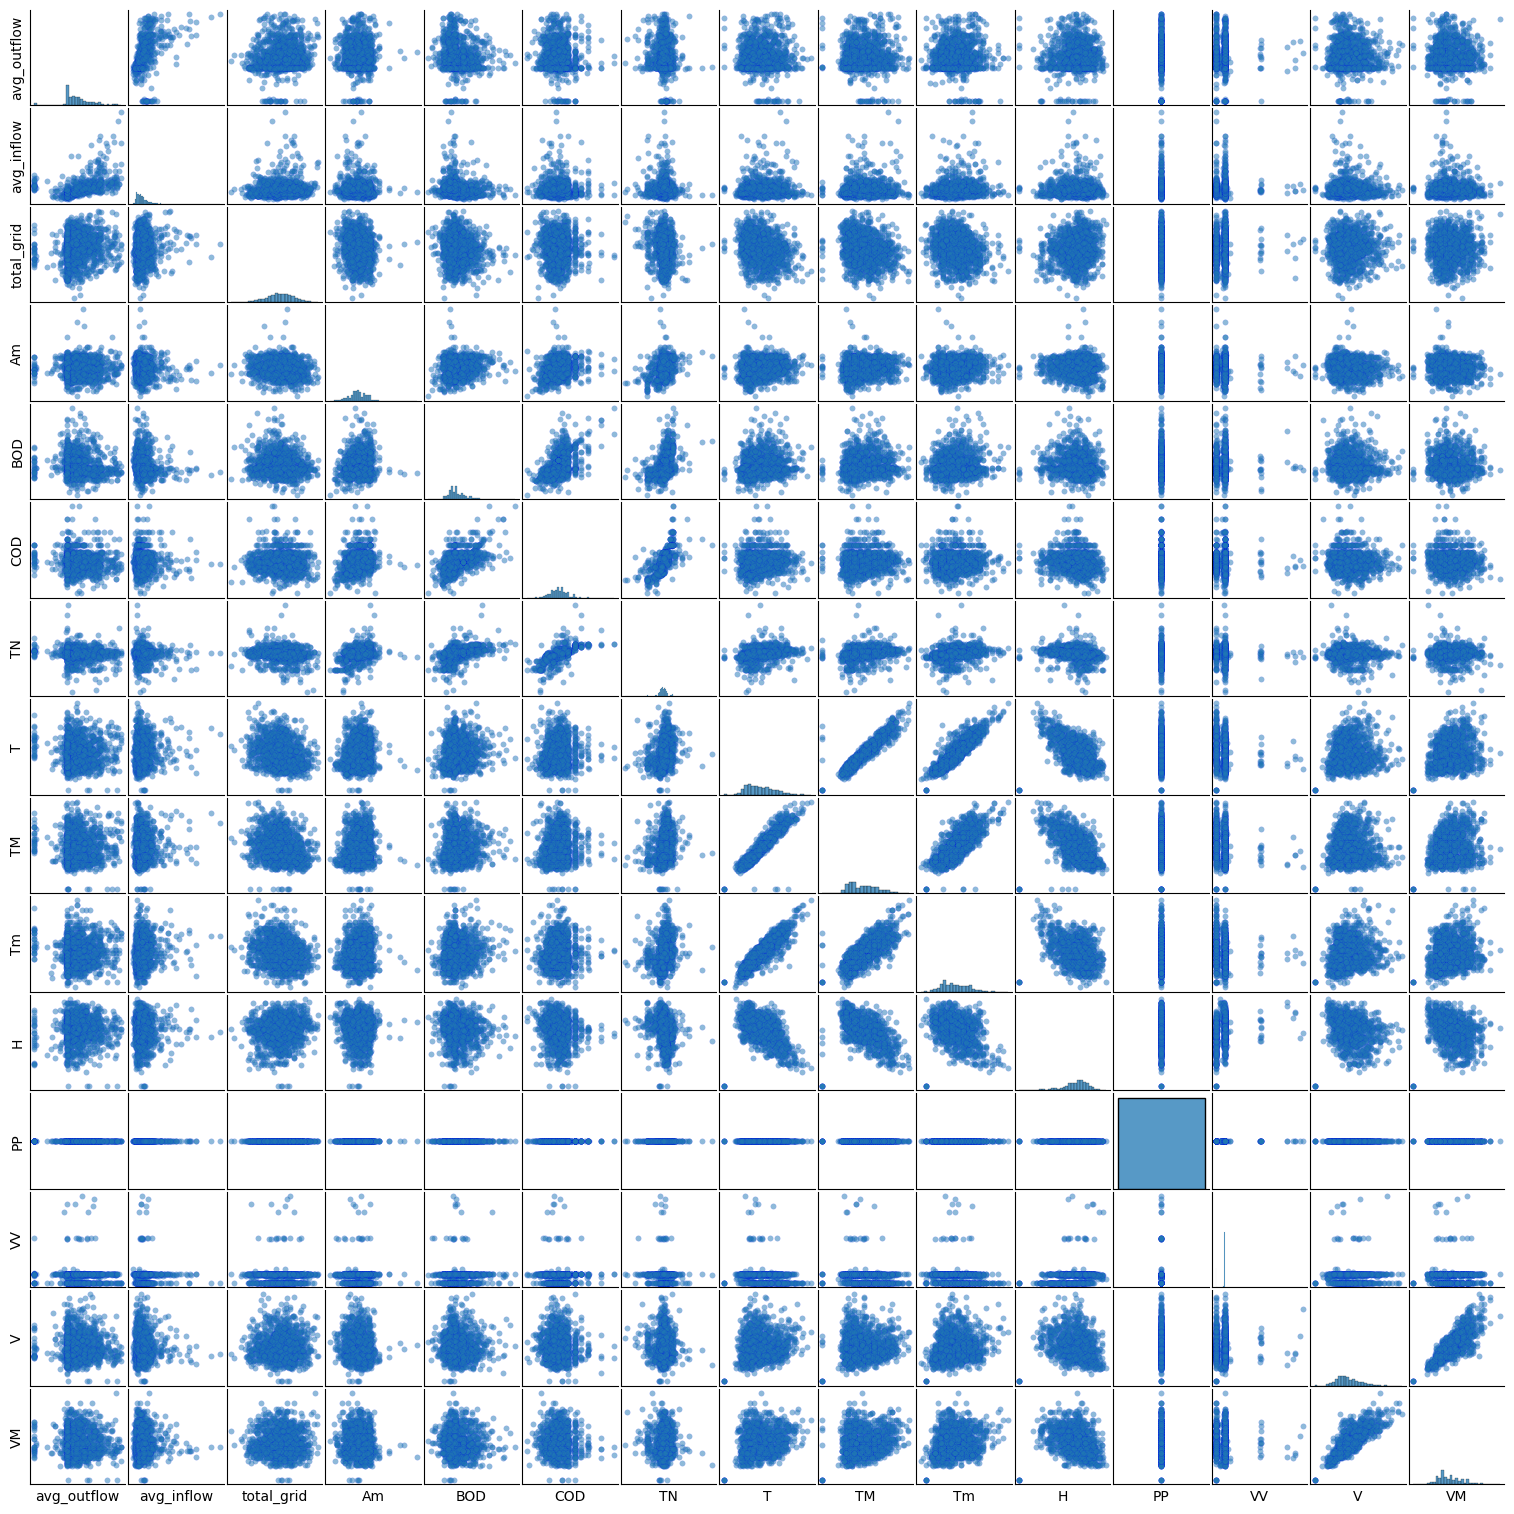

In [9]:
# No_rain analysis - Analise condicional do Marco

print(analyze_dataset(df_no_rain))

pairgrid = sns.pairplot(
    df_no_rain,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                 # marker size
        alpha=0.5,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",   # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")

        # Remove tick marks and labels
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

In [ ]:
# Light_rain analysis - Analise condicional do Marco

pairgrid = sns.pairplot(
    df_light_rain,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                 # marker size
        alpha=0.5,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",   # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")

        # Remove tick marks and labels
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

In [ ]:
# Moderate_rain analysis - Analise condicional do Marco

pairgrid = sns.pairplot(
    df_moderate_rain,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                 # marker size
        alpha=0.5,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",   # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")

        # Remove tick marks and labels
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

In [ ]:
print(analyze_dataset(df_no_rain), "\n")
print(analyze_dataset(df_light_rain), "\n")
print(analyze_dataset(df_moderate_rain), "\n")